# World Economic Data
Four factors affecting the global economy :-
## 1)Corruption
## 2)Cost of Living all around the World.
## 3)Tourism
## 4)Unemployment 


# The world Economie

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

corruption_df = pd.read_csv('corruption.csv')
col_df = pd.read_csv('cost_of_living.csv')
rich_df = pd.read_csv('richest_countries.csv')
tourism_df = pd.read_csv('tourism.csv')
unemployment_df = pd.read_csv('unemployment.csv')


all_df= corruption_df.merge(unemployment_df, on = 'country', how = 'inner', sort = True).merge(rich_df, on = 'country', how = 'inner', sort = True).merge(col_df, on = 'country', how = 'inner', sort = True)
all_df = all_df.sort_values(by =['annual_income','corruption_index','unemployment_rate','gdp_per_capita','purchasing_power_index'], ascending=False).reset_index(drop=True)
all_df = all_df.drop('monthly_income',axis = 1)
all_df.head(11).style.background_gradient()


,country,annual_income,corruption_index,unemployment_rate,gdp_per_capita,cost_index,purchasing_power_index
0,Switzerland,90360,16,5.300000,77324,142.400000,90.100000
1,Norway,84090,15,5.000000,79201,124.600000,95.900000
2,Luxembourg,81110,19,5.200000,134754,113.100000,101.800000
3,Ireland,74520,26,6.600000,106456,119.800000,88.300000
4,United States,70430,33,5.500000,69288,100.000000,100.000000
5,Denmark,68110,12,4.800000,64651,119.900000,80.600000
6,Singapore,64010,15,3.600000,116486,75.000000,121.100000
7,Sweden,58890,15,8.700000,59324,109.300000,76.500000
8,Qatar,57120,37,0.300000,93521,71.400000,113.600000
9,Australia,56760,27,5.100000,55807,118.000000,68.300000


<AxesSubplot:>

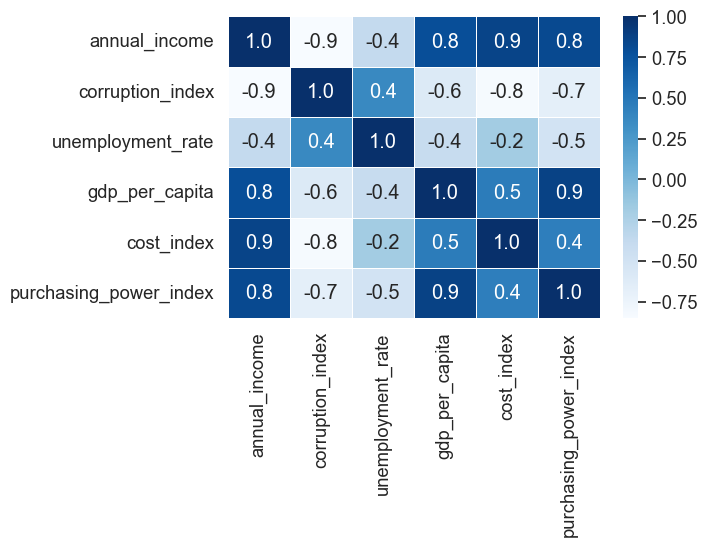

In [2]:
#all_df.corr().style.background_gradient(vmin = 0.5)
fig = plt.figure(dpi = 100)
sns.set(rc={'figure.figsize':[25,10]},font_scale=1.2)
sns.heatmap(all_df.corr(), annot = True,fmt='.1f',linewidths=.5,cmap='Blues')

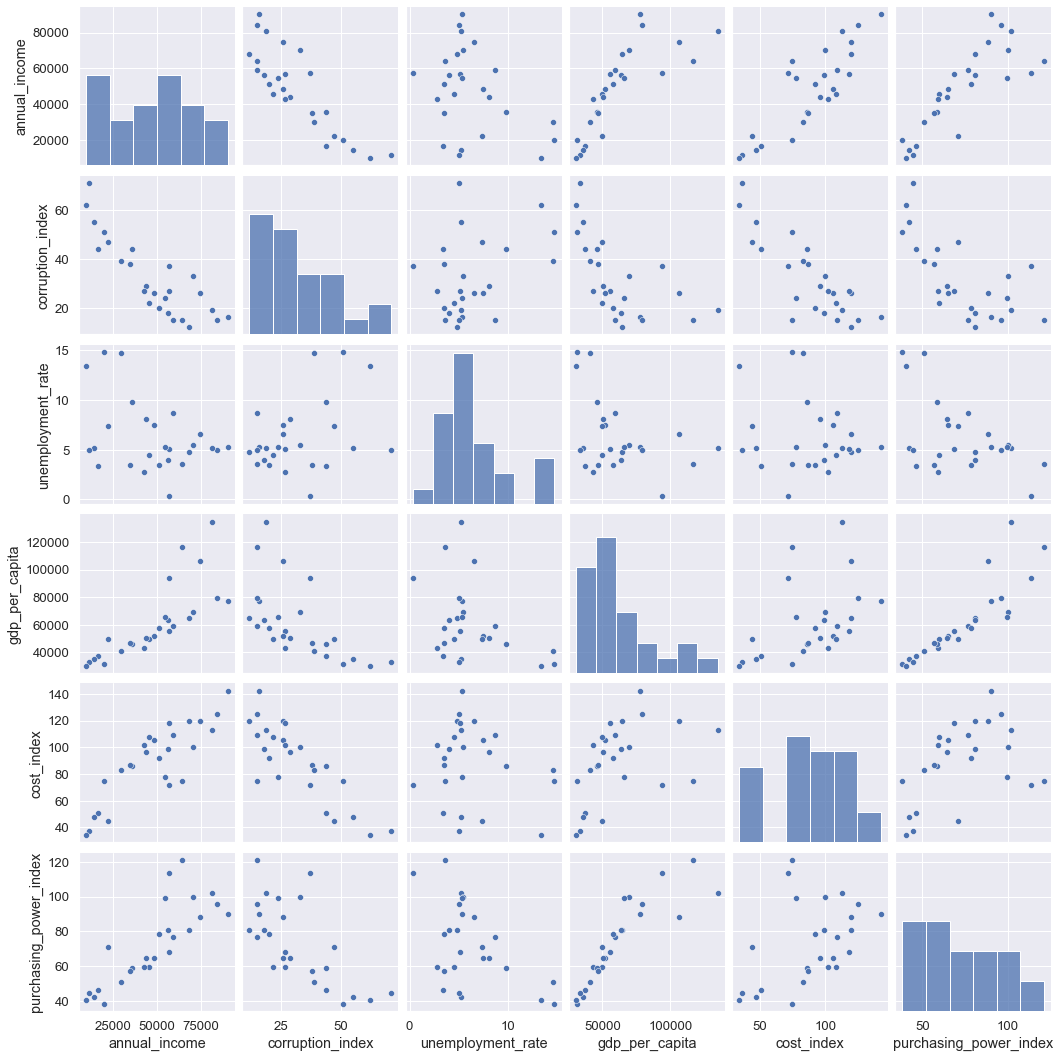

In [3]:
sns.pairplot(all_df)

## 1) corruption

In [4]:
corruption_df = pd.read_csv("corruption.csv")
corruption_df. head(11)

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15
5,Sweden,58890,15
6,Switzerland,90360,16
7,Netherlands,56370,18
8,Luxembourg,81110,19
9,Germany,51040,20


In [5]:
corruption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           110 non-null    object
 1   annual_income     110 non-null    int64 
 2   corruption_index  110 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [6]:
corruption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,110.0,17195.727273,23741.147397,240.0,1470.00,4130.0,25410.0,90360.0
corruption_index,110.0,59.200000,22.170234,12.0,41.75,69.0,75.0,89.0


<AxesSubplot:>

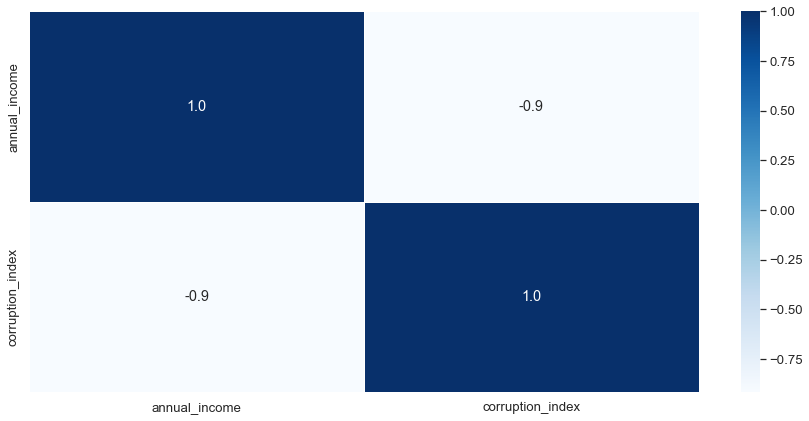

In [7]:
sns.set(rc={'figure.figsize':[15,7]},font_scale=1.2)
sns.heatmap(corruption_df.corr(),annot=True,fmt='.1f',linewidths=.5,cmap='Blues')

<AxesSubplot:xlabel='country'>

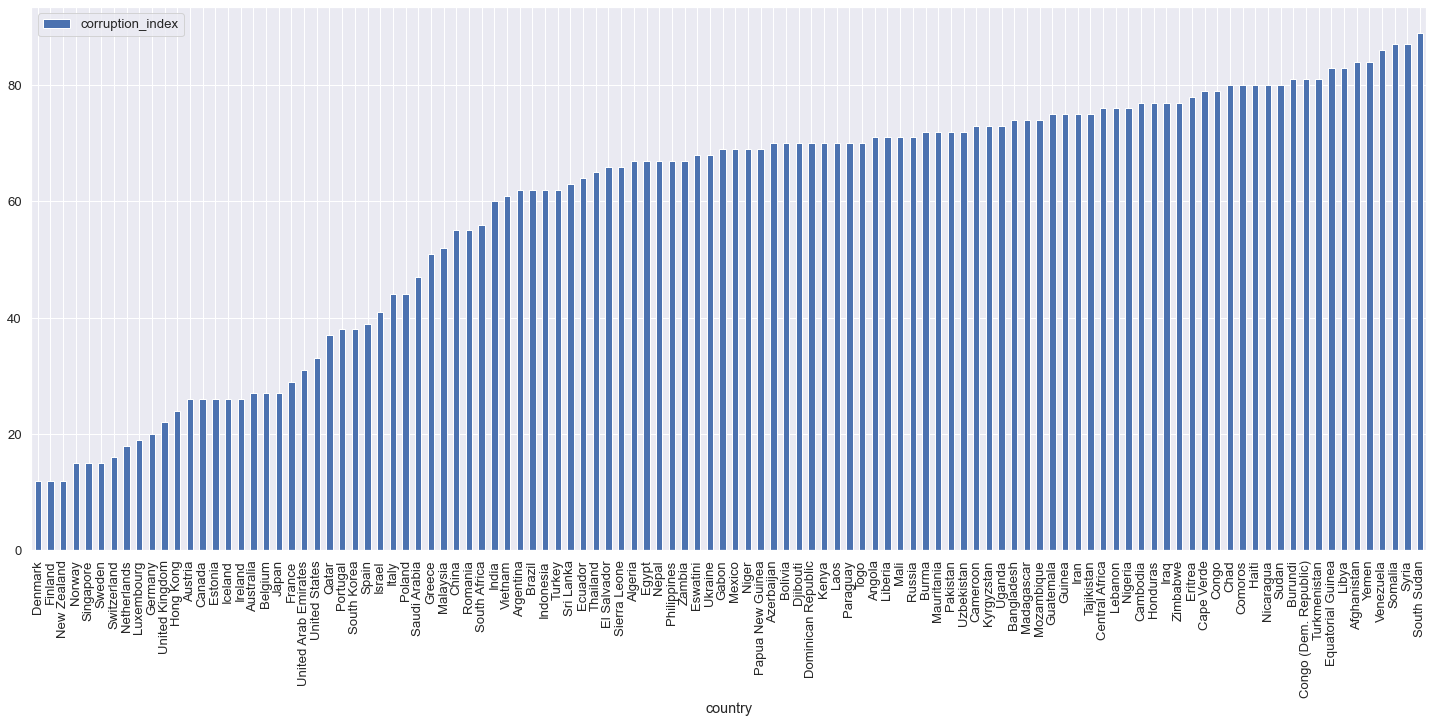

In [8]:
# relationship between corruption_index and country
corruption_df.plot(x='country', y='corruption_index', rot=90, kind='bar', figsize=(25,10))

<AxesSubplot:xlabel='country'>

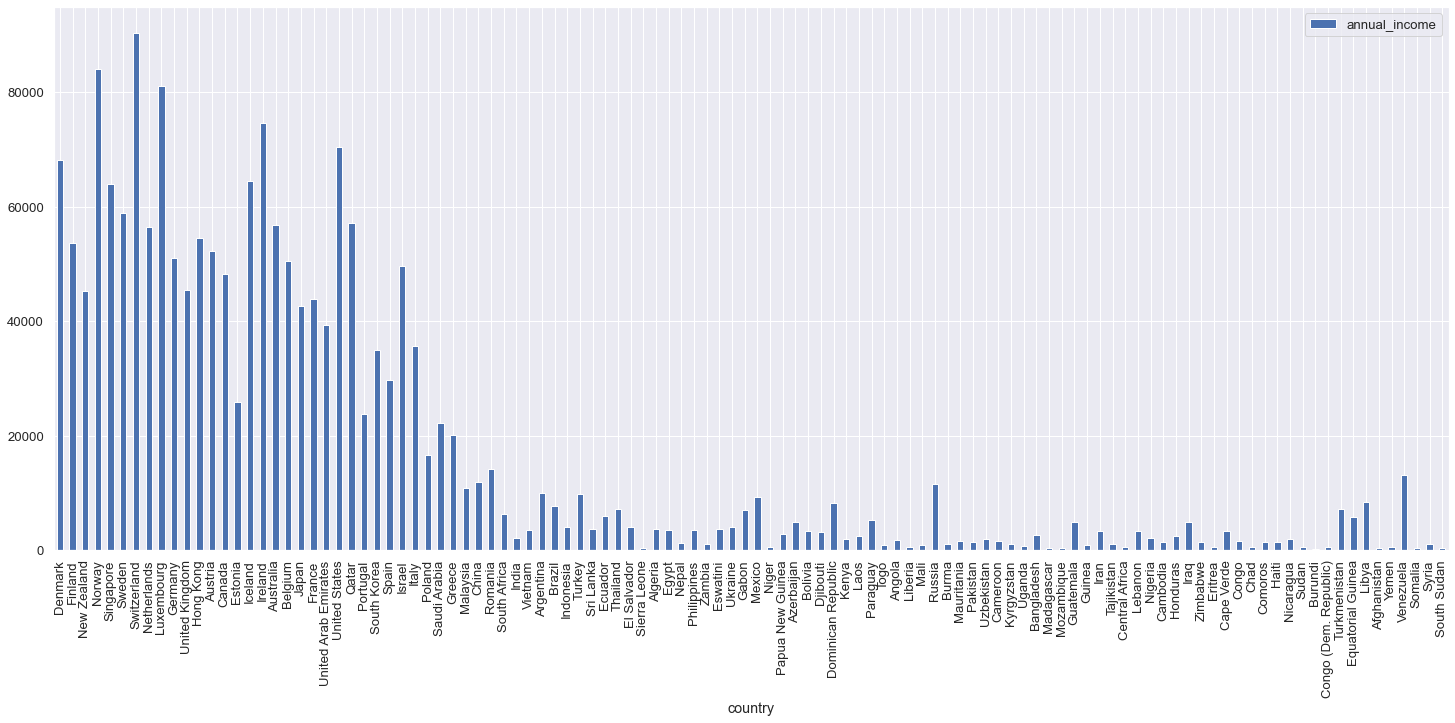

In [9]:
# relationship between corruption_index and country
corruption_df.plot(x='country', y='annual_income', rot=90, kind='bar', figsize=(25,10))

In [10]:
# Top 10 countries with highest corruption_index
top10_corruption_df = corruption_df.sort_values(by='corruption_index',ascending=False)[:10]
top10_corruption_df

,country,annual_income,corruption_index
109,South Sudan,460,89
108,Syria,1170,87
107,Somalia,450,87
106,Venezuela,13080,86
105,Yemen,670,84
104,Afghanistan,500,84
103,Libya,8430,83
102,Equatorial Guinea,5810,83
101,Turkmenistan,7220,81
100,Congo (Dem. Republic),580,81


In [11]:
# Top 10 countries with lowest corruption_index
top10_corruption_df = corruption_df.sort_values(by='corruption_index',ascending=False)[10:]
top10_corruption_df
# relationship between corruption_index and country for top 10 countries with respect to corruption_index
#top10_corruption_df.plot(x='country', y='corruption_index', rot=90, kind='bar', figsize=(20,10))

,country,annual_income,corruption_index
99,Burundi,240,81
95,Comoros,1460,80
94,Chad,650,80
96,Haiti,1420,80
97,Nicaragua,2010,80
...,...,...,...
3,Norway,84090,15
5,Sweden,58890,15
2,New Zealand,45340,12
1,Finland,53660,12


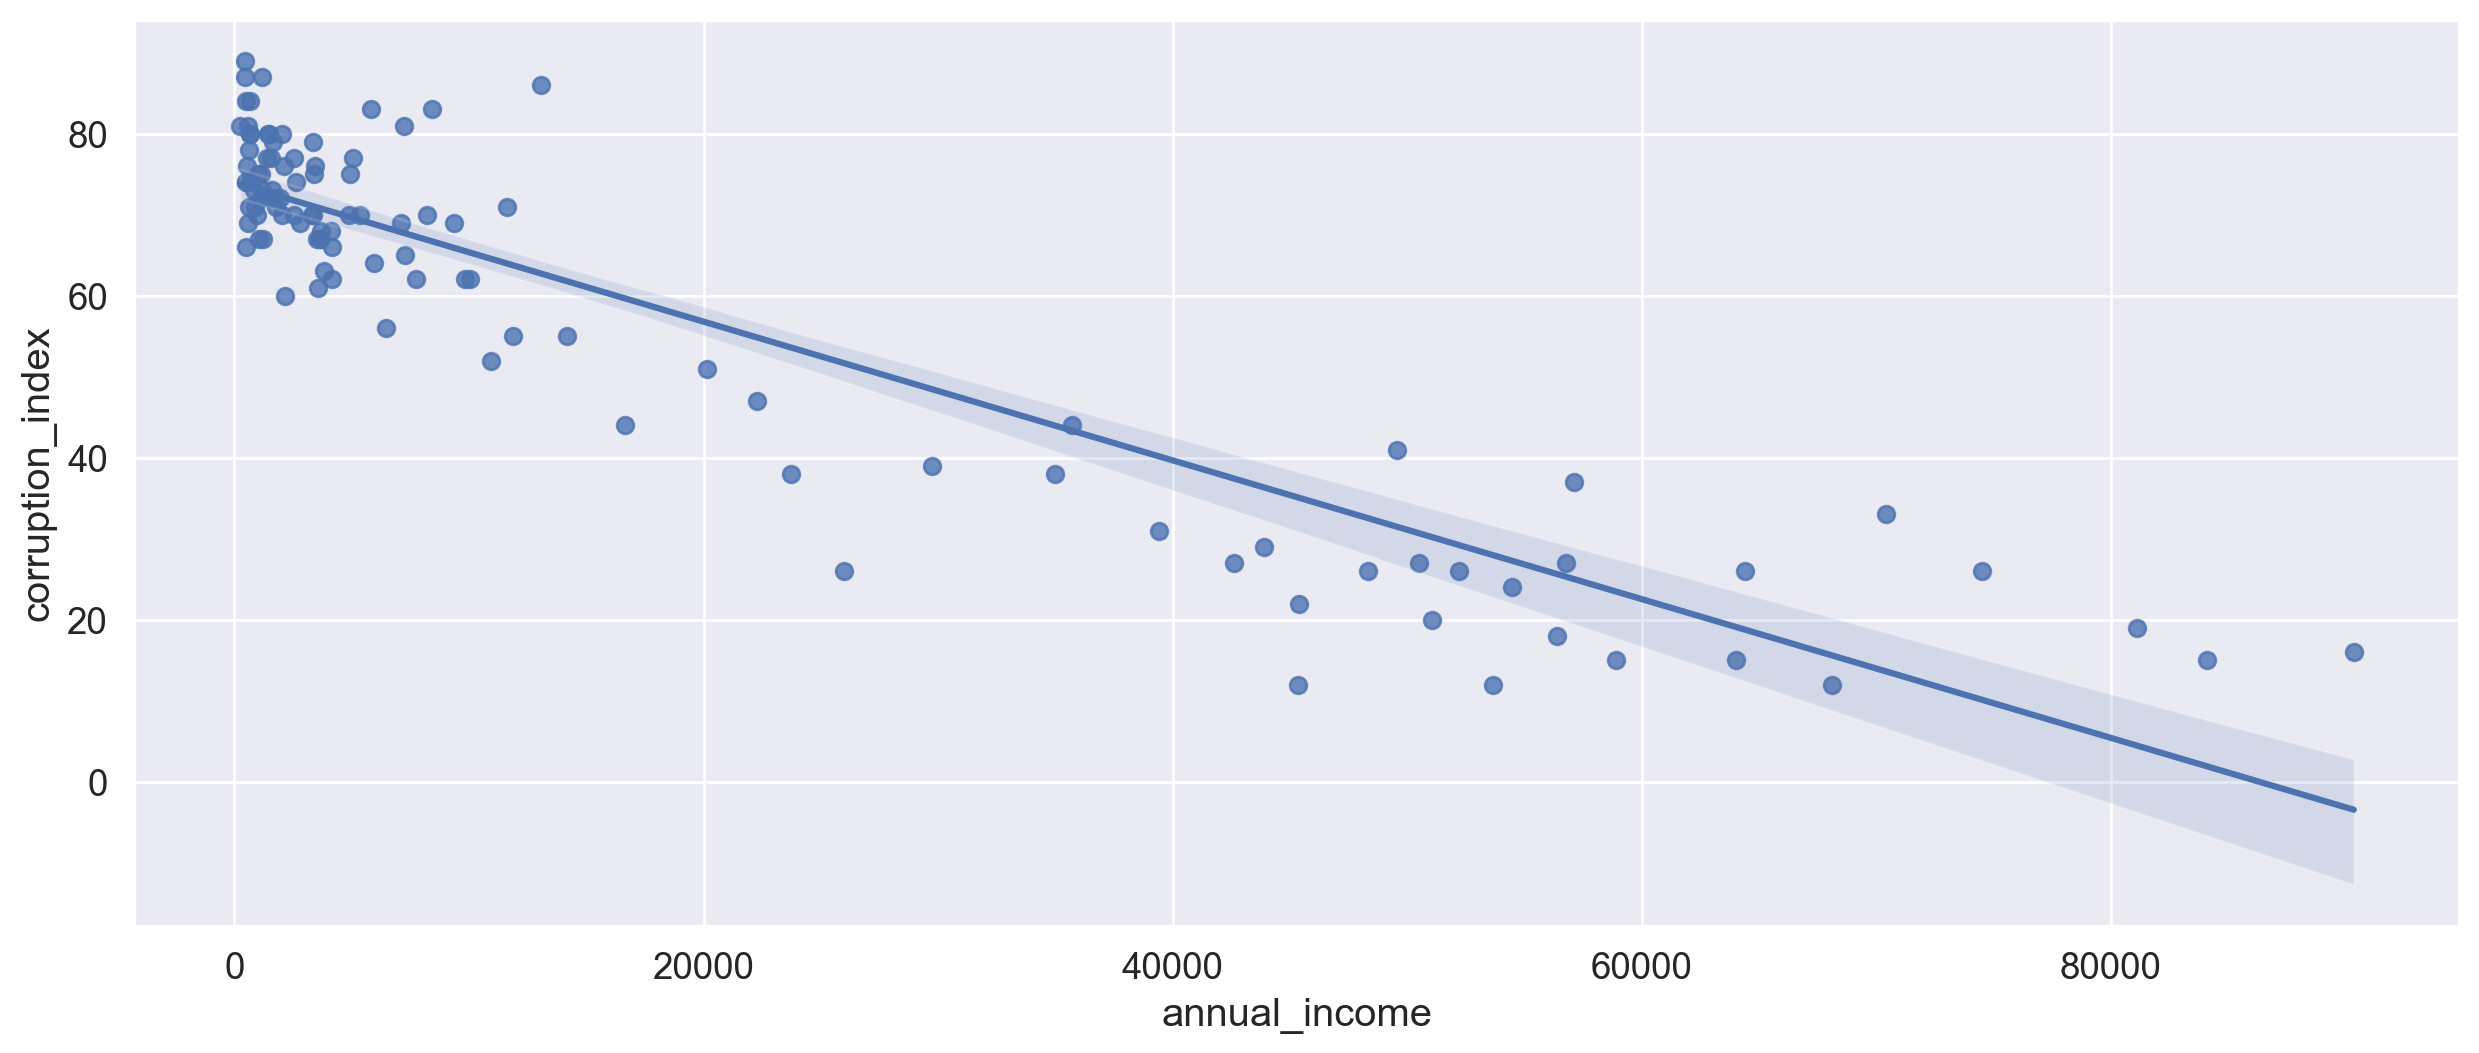

In [12]:
# relationship between annual_income and corruption_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=corruption_df, x='annual_income', y='corruption_index', marker="o")
plt.show();

# Data Pre_Processing 

In [13]:
corruption_df.drop(['country'],axis=1)

,annual_income,corruption_index
0,68110,12
1,53660,12
2,45340,12
3,84090,15
4,64010,15
...,...,...
105,670,84
106,13080,86
107,450,87
108,1170,87


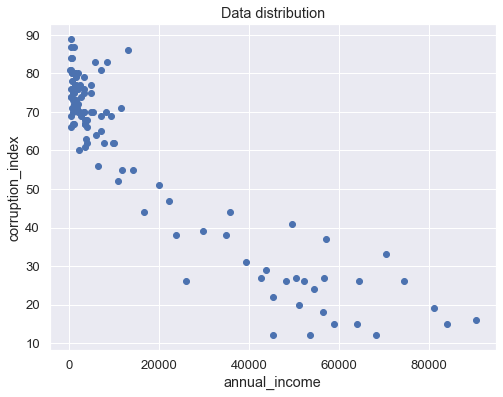

In [14]:
#Assign feature column to x and label column to y
x=corruption_df['annual_income'].values.reshape(-1,1)
y=corruption_df['corruption_index'].values.reshape(-1,1)

#Visualization Data distribution
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y)
plt.xlabel('annual_income')
plt.ylabel('corruption_index')
plt.show()

In [15]:
#Model Training
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
LR.intercept_,LR.coef_#w0(y_axis),w1(slope)  h@=mx+b  

(array([73.91978476]), array([[-0.00085601]]))

In [16]:
#Model prediction
y_pred=LR.predict(x)
cost_error=LR.predict(x)-y # Cost Function Error = Y Acualy - y Prediction
print('Acualy Values =\n ',LR.predict(x[:5]) )
print('Prediction Values =\n ',y[:5] )
print('Error Values = \n',cost_error[:5] )

Acualy Values =
  [[15.61666537]
 [27.98606892]
 [35.10810611]
 [ 1.93756028]
 [19.12632313]]
Prediction Values =
  [[12]
 [12]
 [12]
 [15]
 [15]]
Error Values = 
 [[  3.61666537]
 [ 15.98606892]
 [ 23.10810611]
 [-13.06243972]
 [  4.12632313]]


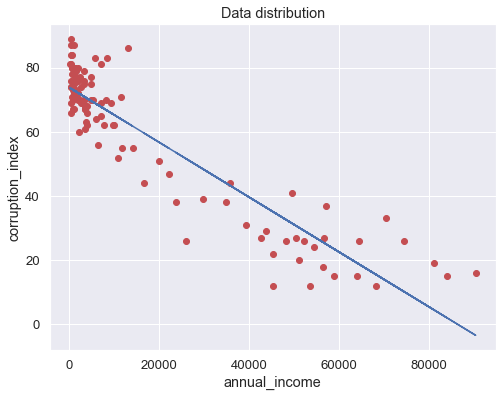

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,c='r')
plt.plot(x,y_pred)#Best Fit Line
plt.title('Data distribution')
plt.xlabel('annual_income')
plt.ylabel('corruption_index')
plt.show()

# Model Evaluations (corruption)

In [18]:

#Standerd Error = sum(y-y_pred)
Standerd_Error =np.sum(y-LR.predict(x))
print('Standerd_Error : ',Standerd_Error)

#MAE=1/m *abs(y-y_pred)
import sklearn.metrics as mc
MAE=mc.mean_absolute_error(y,y_pred)
print('MAE is : ',MAE)#STD is larg

# MSE = (1/n) * np.sum((h_x - y)**2)
MSE=mc.mean_squared_error(y,y_pred)
print('MSE is : ',MSE)


#import math
#MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
#RMSE = math.sqrt(MSE)
RMSE=np.sqrt(mc.mean_squared_error(y,y_pred))
print('RMSE is : ',RMSE)

#R Squared =1- (yi Acualy - yi Prediction)**2 / (yi Acualy- yi mean)**2
#𝑅2 = 1 - (SUM((y - ypred)**2) / SUM((y - AVG(y))**2))
#R Squared =1- (MSA / (yi Acualy- yi mean)**2
from sklearn.metrics import r2_score
r2=r2_score(y,y_pred)
𝑅2 = 1 - (sum((y - y_pred)**2) / sum((y - np.mean(y))**2))
print('R Square Manually : ' ,R2)
print('R Square : ' ,r2)


#Adjusted_R2 = 1-(1-r2)*(m-1)/m-p-1
#m= Number Of Rows =  110(m= x.shape[0] // len(x))
#P= Number Of Features
Adjusted_R2 =1-(1-r2)*(len(x)-1)/len(x)-1-1
print('Adjusted R2 : ' ,Adjusted_R2)



Standerd_Error :  4.973799150320701e-13
MAE is :  6.893194313183534
MSE is :  77.79115051296647
RMSE is :  8.8199291671173
R Square Manually :  [0.84028127]
R Square :  0.8402812743781439
Adjusted R2 :  -1.158266737207112


In [19]:
Evaluations =pd.DataFrame({'MSE':[MSE],
                           'RMSE':[RMSE],
                           'MAE':[MAE],
                           'R Square':[r2],
                           'Adjusted R2':[Adjusted_R2],
                          'Standerd_Error ':[Standerd_Error]})
Evaluations.T

,0
MSE,7.779115e+01
RMSE,8.819929e+00
MAE,6.893194e+00
R Square,8.402813e-01
Adjusted R2,-1.158267e+00
Standerd_Error,4.973799e-13


In [20]:
data_pred=pd.DataFrame({'annual_income':x.flatten(),
                   'corruption_index':y.flatten(),
                   'corruption_Pred':y_pred.flatten(),
                   "Cost_Error":cost_error.flatten()})
#data_pred.style.background_gradient(axis=0, gmap=data_pred['Scores_Pred'], cmap='YlOrRd')
data_pred.head(10)

,annual_income,corruption_index,corruption_Pred,Cost_Error
0,68110,12,15.616665,3.616665
1,53660,12,27.986069,15.986069
2,45340,12,35.108106,23.108106
3,84090,15,1.937560,-13.062440
4,64010,15,19.126323,4.126323
5,58890,15,23.509115,8.509115
6,90360,16,-3.429648,-19.429648
7,56370,18,25.666271,7.666271
8,81110,19,4.488482,-14.511518
9,51040,20,30.228826,10.228826


# summary for the corruption

1- 110 countries are being studied in terms of their secondary income and their relationship with corruption and its impact on the economy

2- Average of annual income in country = 17195.727273 ,And Average of corruption_index in country = 59.200000

3- The highest annual_income in corruption_index rankings : Switzerland =	90360 ,and his corruption_index = 16

4- The lowest annual_income in corruption_index rankings : Burundi = 240, and his corruption_index =81

5- Top one highest the corruption_index rankings = South Sudan = 89 , and his annual_income = 460

6- Top one lowest the corruption_index rankings : Denmark = 12 , and his annual_income = 68110	


7- There is a clear negative linear relation between annual income and corruption index and it can be seen from the    Above scatter plot. If annual income increases corruption index decreases for a country and vice versa.

# ------------------------------------------------------------------------------------------------------------

#  2) cost_of_living

In [21]:
col_df.head(11)

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
5,New Caledonia,125.8,1101,14.9
6,Turks and Caicos Islands,124.6,1967,26.9
7,Norway,124.6,7008,95.9
8,Barbados,121.5,1393,19.5
9,Denmark,119.9,5676,80.6


In [22]:
col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 107 non-null    object 
 1   cost_index              107 non-null    float64
 2   monthly_income          107 non-null    int64  
 3   purchasing_power_index  107 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ KB


In [23]:
col_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_index,107.0,62.555140,33.747716,22.8,36.40,48.9,84.55,157.6
monthly_income,107.0,1826.532710,2100.275033,87.0,295.00,782.0,3130.00,9712.0
purchasing_power_index,107.0,38.150467,30.588024,3.4,14.05,25.8,59.10,121.1


In [24]:
col_df.corr()

,cost_index,monthly_income,purchasing_power_index
cost_index,1.000000,0.872141,0.709241
monthly_income,0.872141,1.000000,0.918266
purchasing_power_index,0.709241,0.918266,1.000000


<AxesSubplot:>

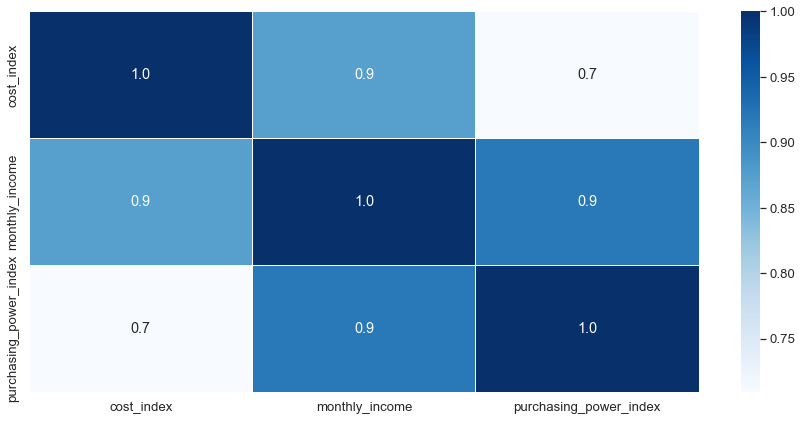

In [25]:
sns.set(rc={'figure.figsize':[15,7]},font_scale=1.2)
sns.heatmap(col_df.corr(),annot=True,fmt='.1f',linewidths=.5,cmap='Blues')

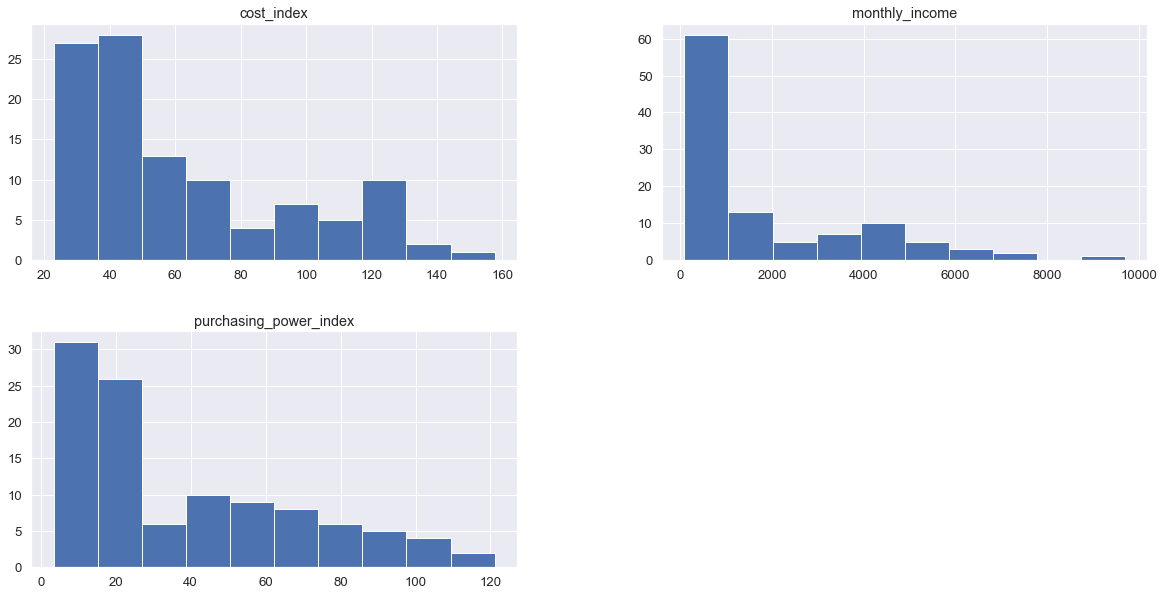

In [26]:
col_df.hist(figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='country'>

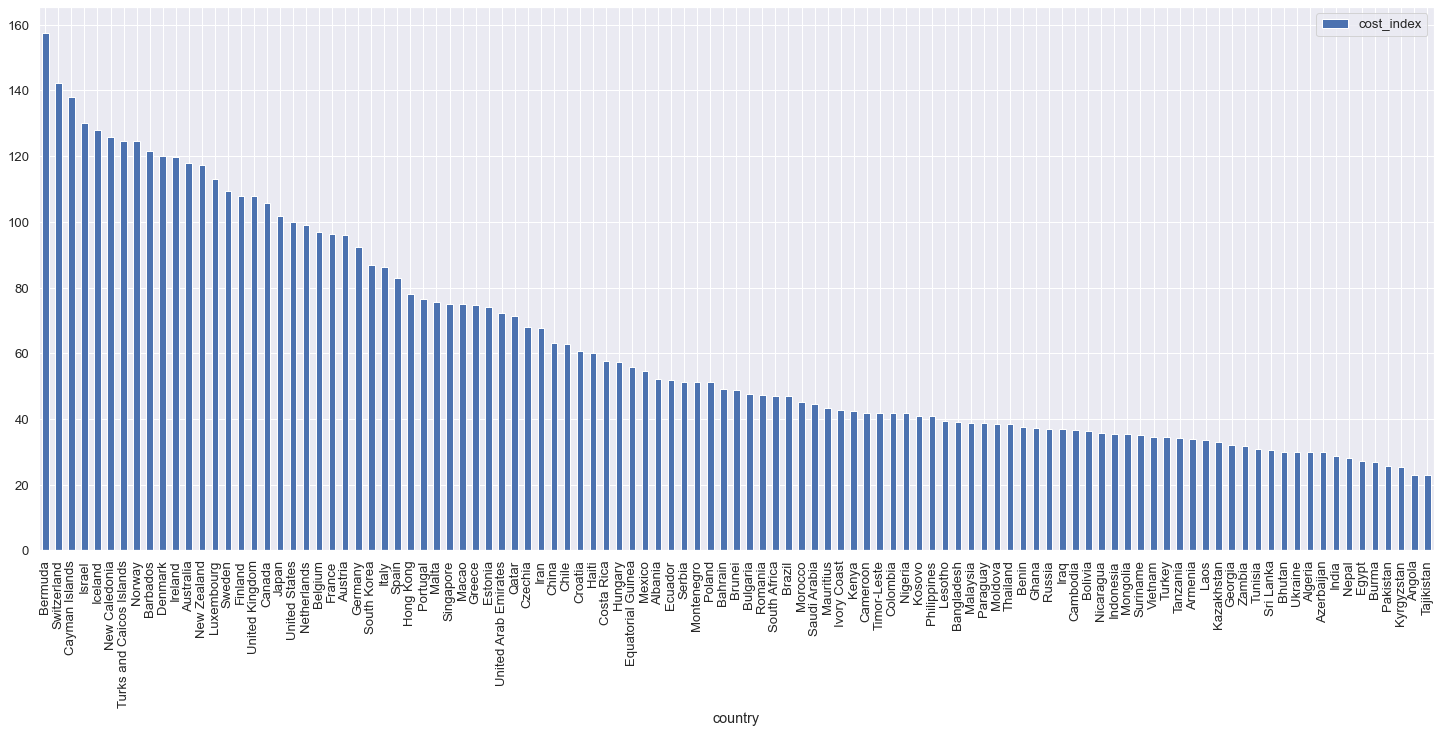

In [27]:
# relationship between cost_index and country
col_df.plot(x='country', y='cost_index', rot=90, kind='bar', figsize=(25,10))

In [28]:
# Top 10 countries with highest cost_index
top10_col_df = col_df.sort_values(by='cost_index',ascending=False)[:10]
top10_col_df

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
5,New Caledonia,125.8,1101,14.9
6,Turks and Caicos Islands,124.6,1967,26.9
7,Norway,124.6,7008,95.9
8,Barbados,121.5,1393,19.5
9,Denmark,119.9,5676,80.6


<AxesSubplot:xlabel='country'>

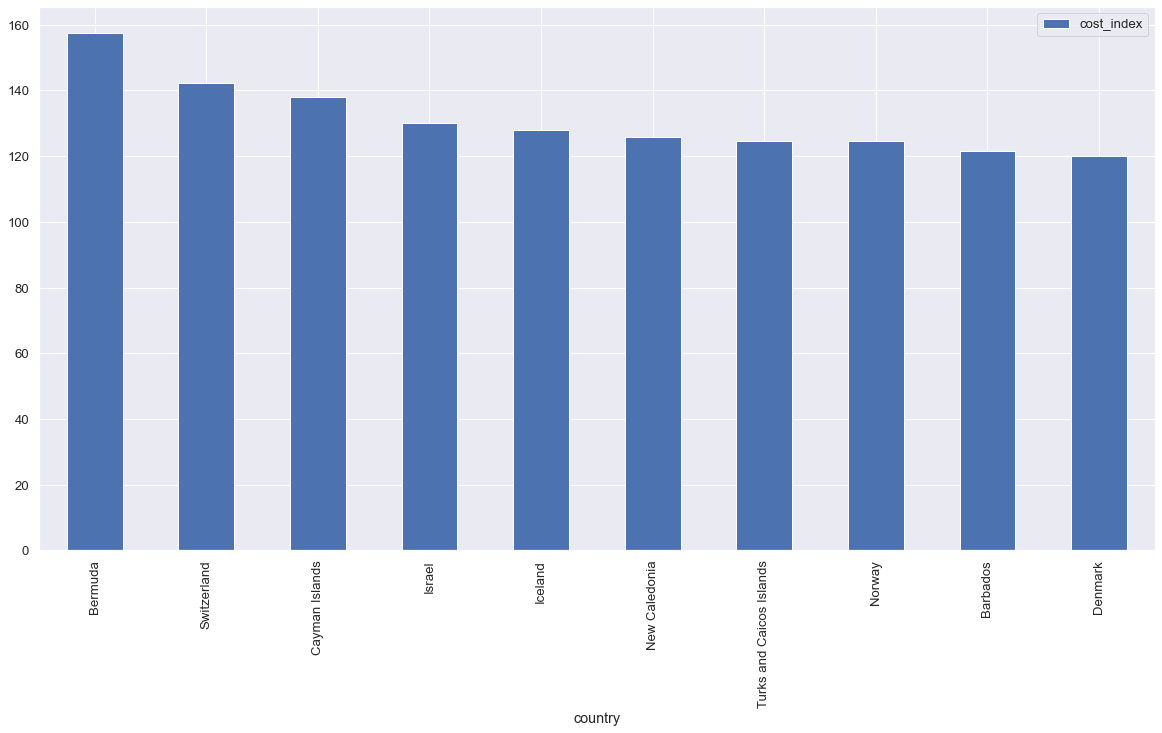

In [29]:
# relationship between cost_index and country for top 10 countries with respect to cost_index
top10_col_df.plot(x='country', y='cost_index', rot=90, kind='bar', figsize=(20,10))

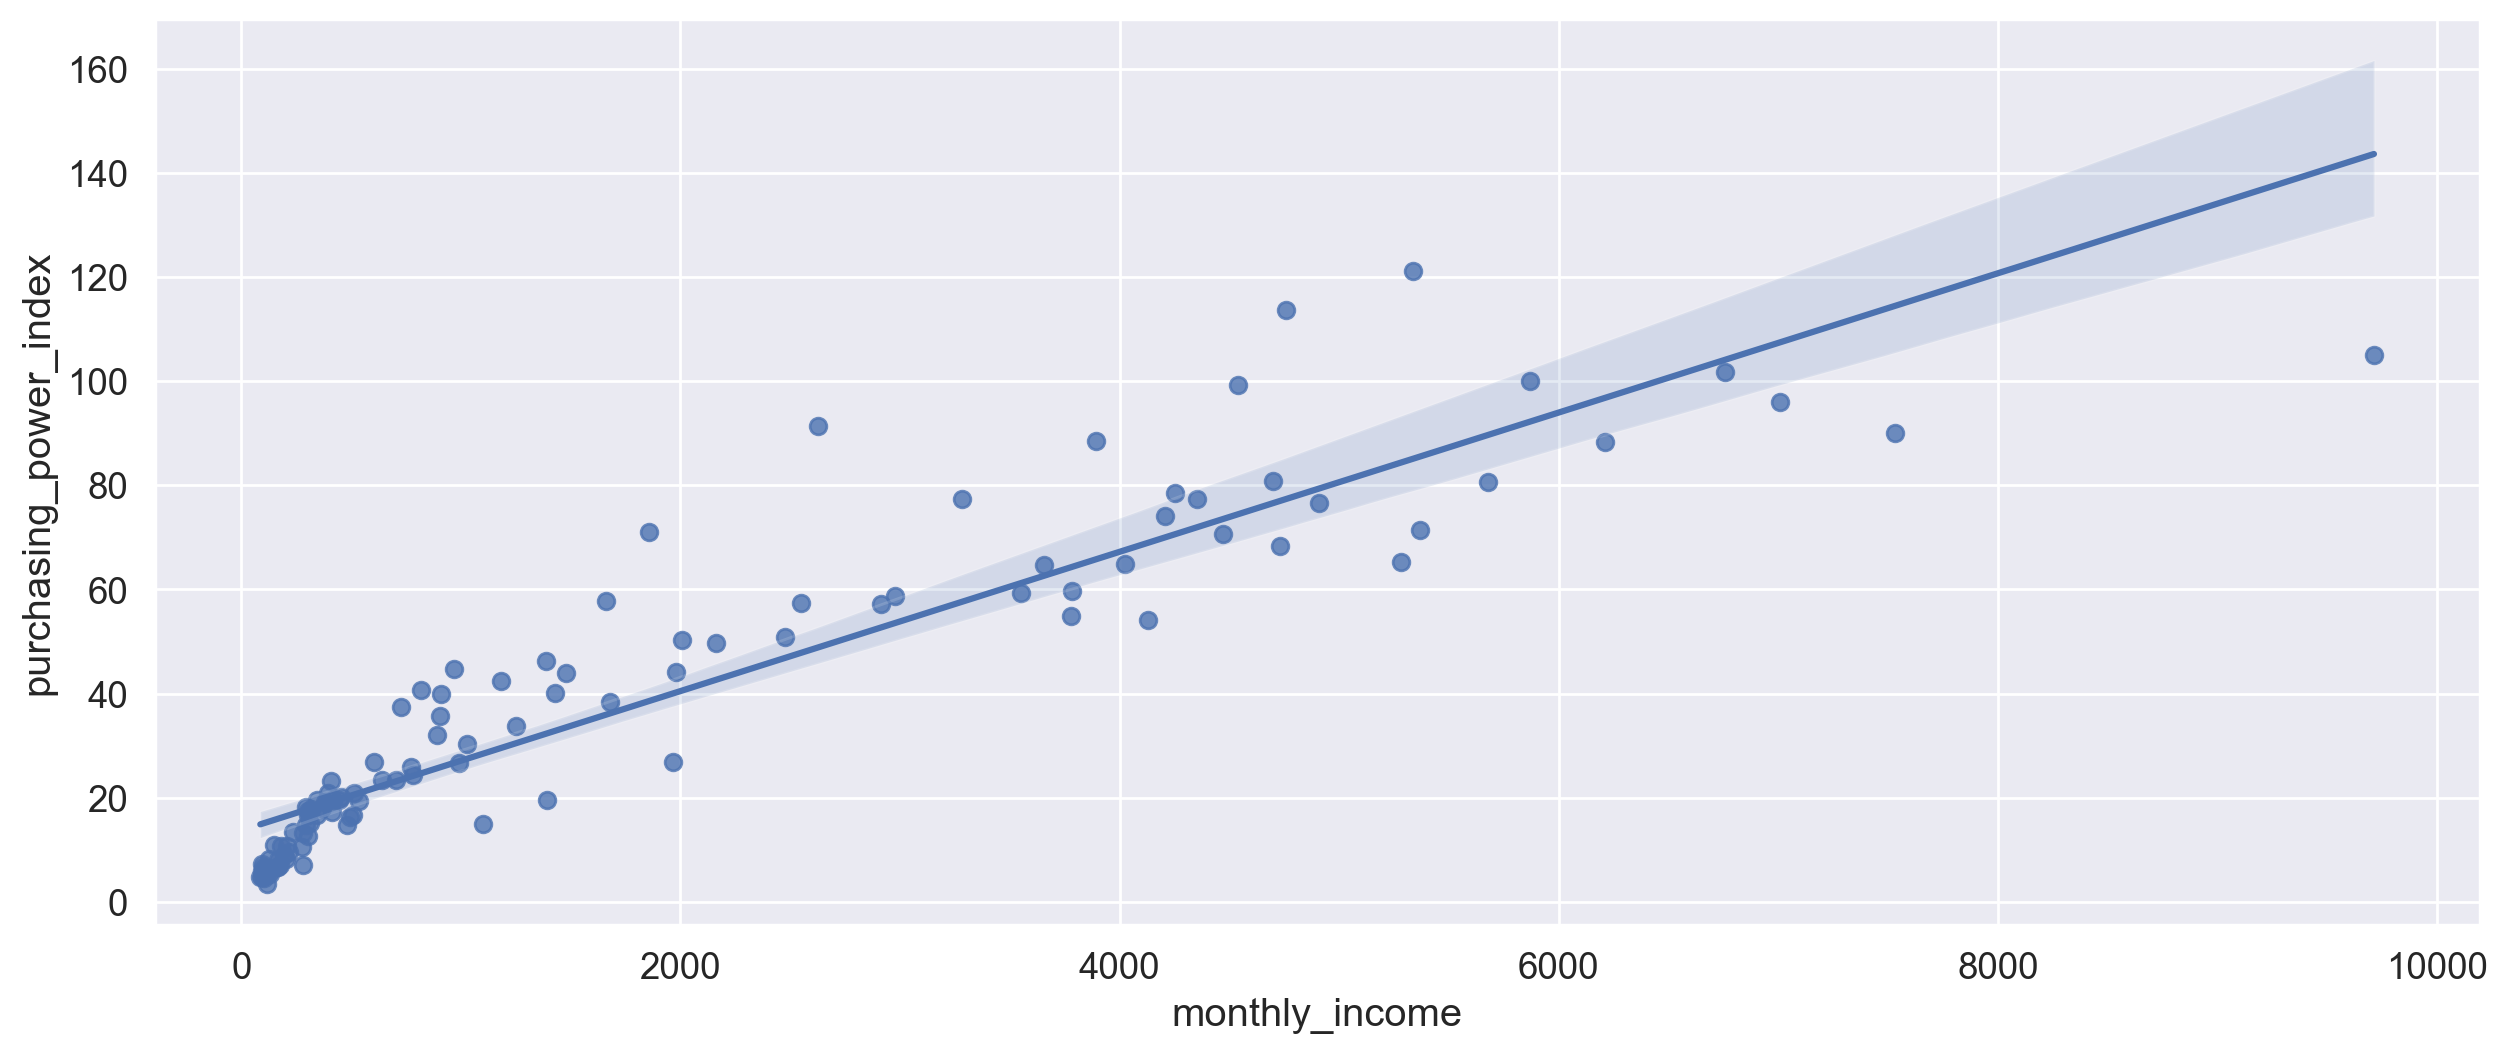

In [30]:
#relationship between monthly_income and purchasing_power_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=col_df, x='monthly_income', y='purchasing_power_index', marker="o")
plt.show();


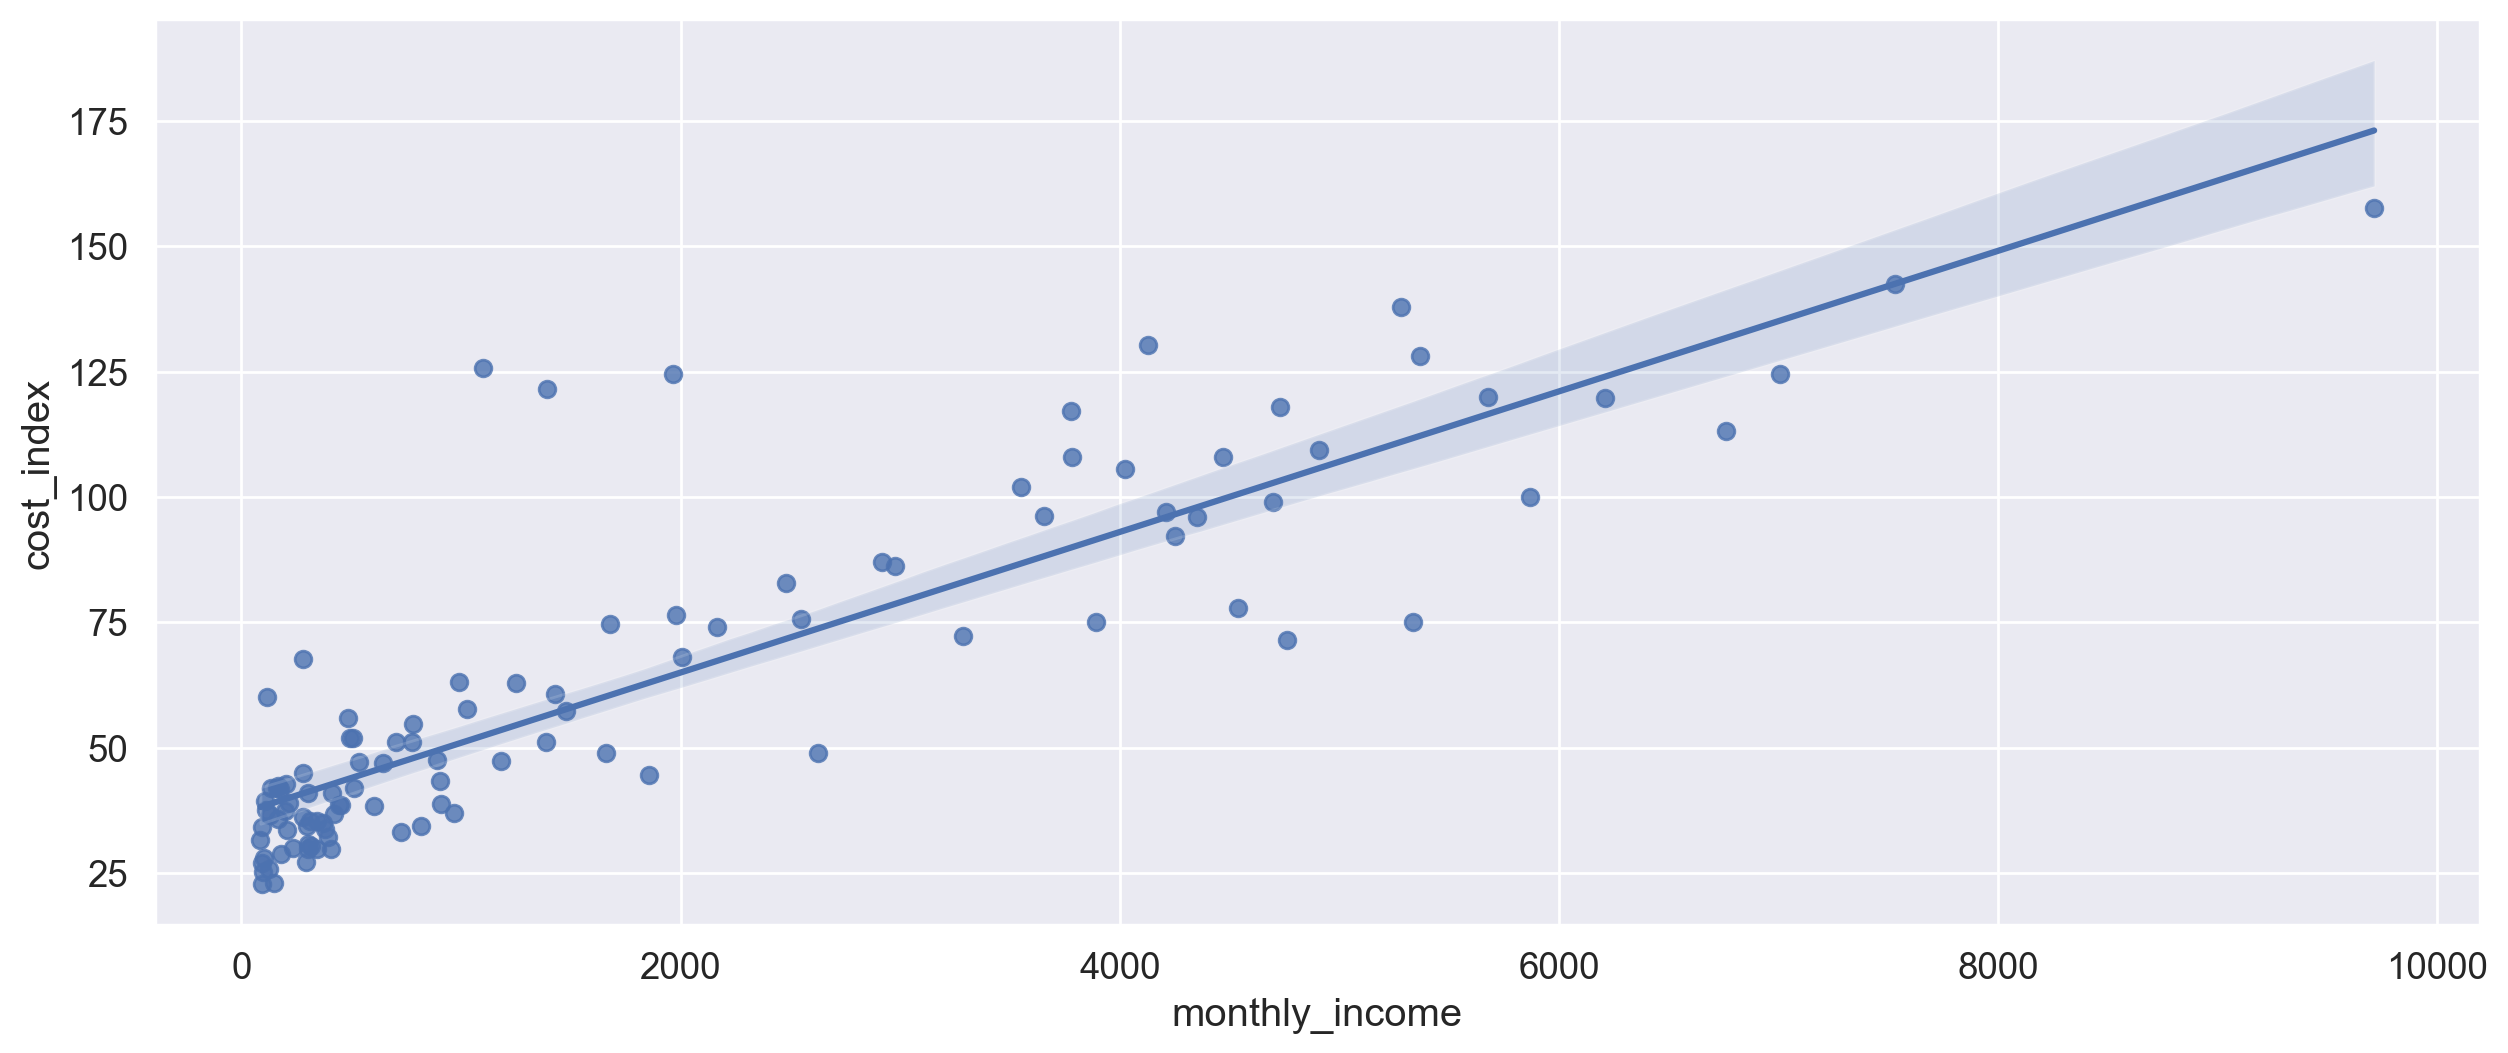

In [31]:
# relationship between  monthly_income and cost_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=col_df, x='monthly_income', y='cost_index', marker="o")
plt.show();

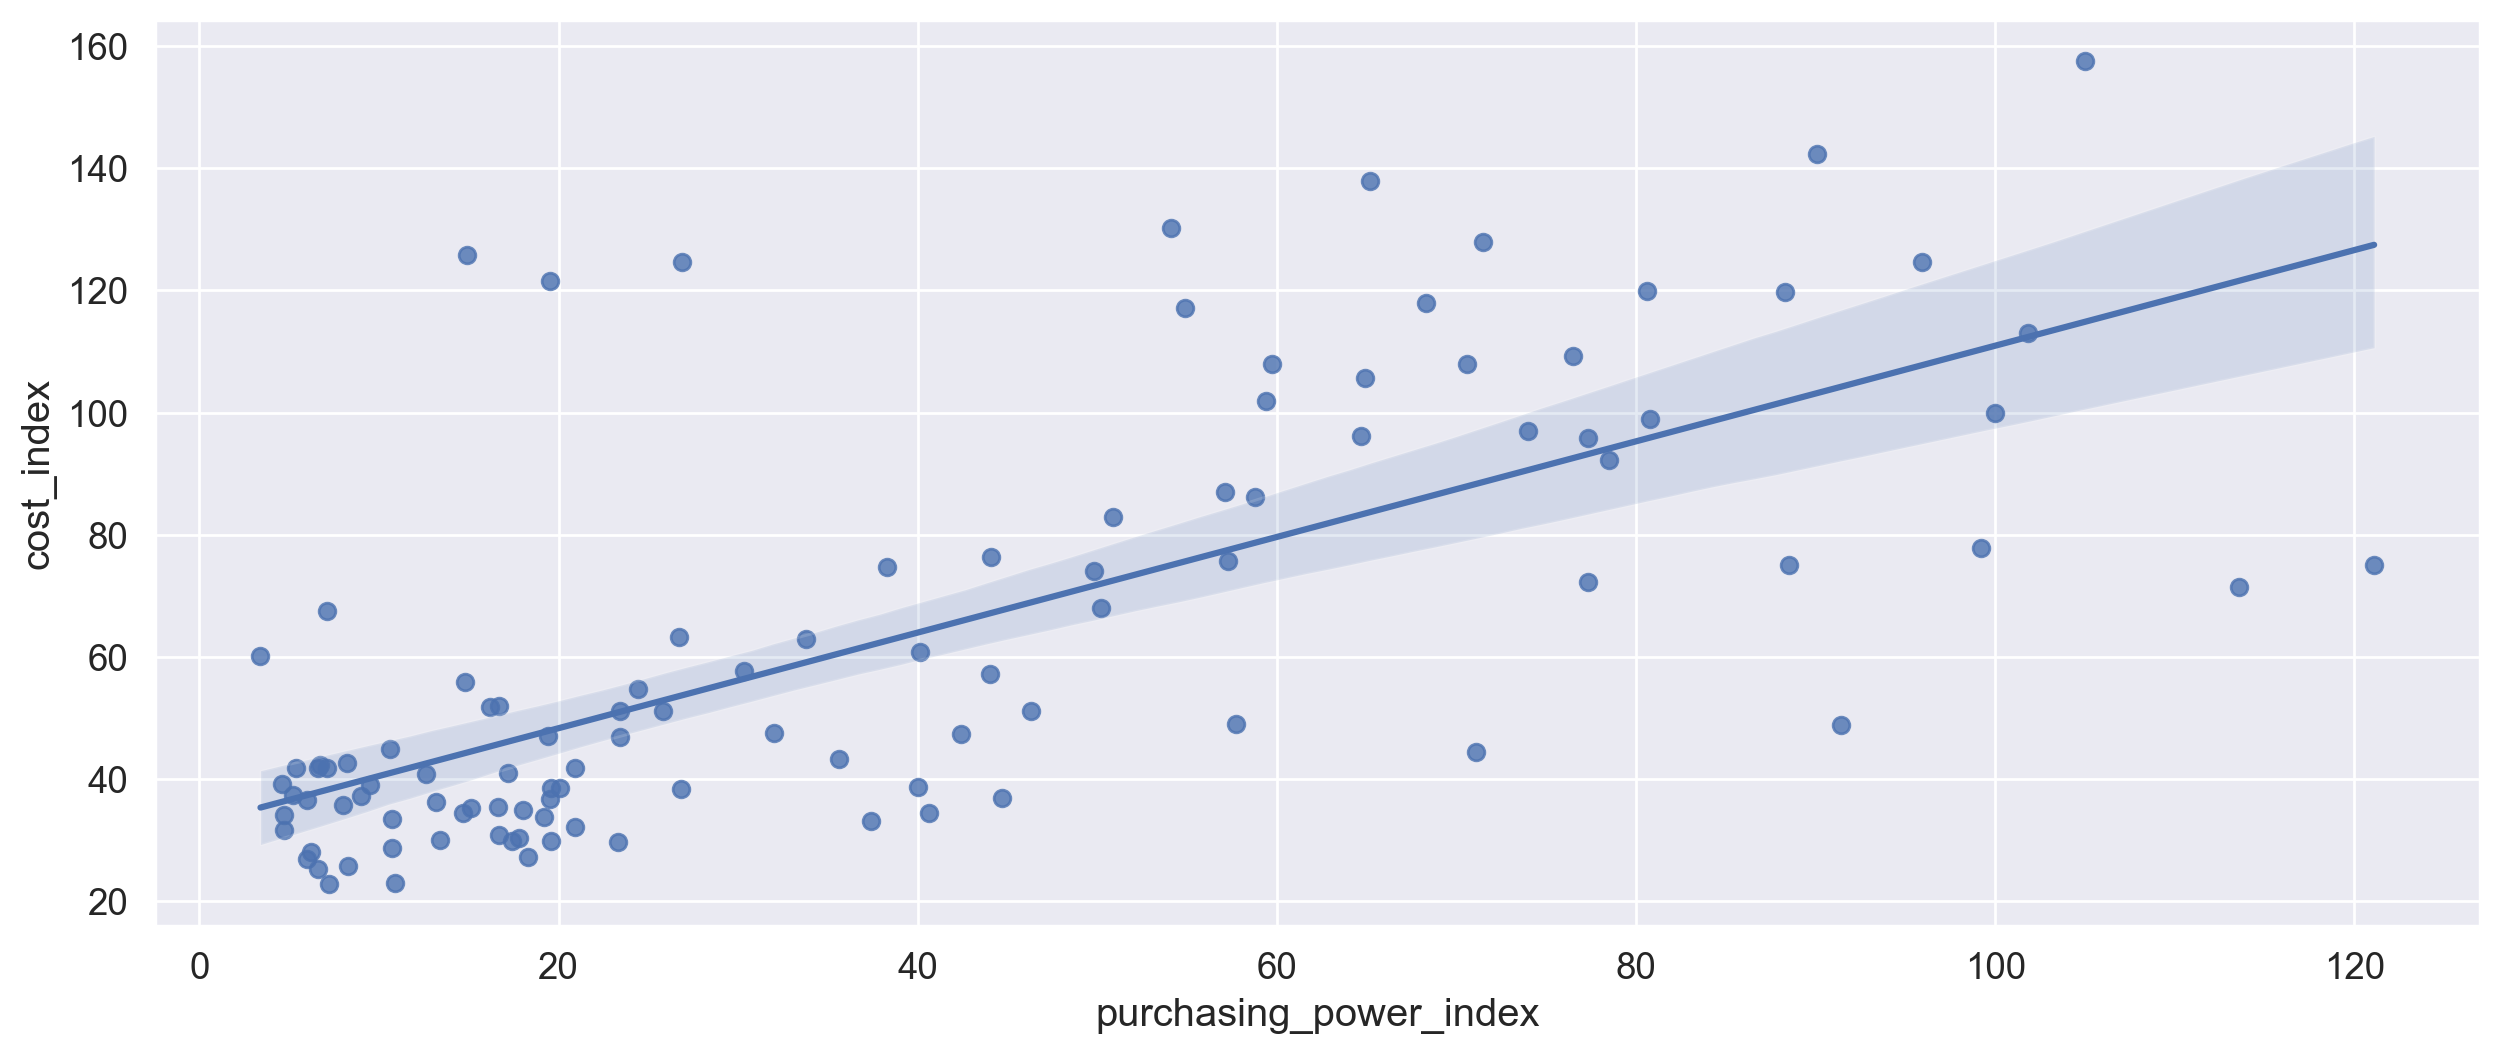

In [32]:
# relationship between purchasing_power_index and cost_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=col_df, x='purchasing_power_index', y='cost_index', marker="o")
plt.show();


In [33]:
col_df.drop(['country'],axis=1)

,cost_index,monthly_income,purchasing_power_index
0,157.6,9712,105.0
1,142.4,7530,90.1
2,137.9,5281,65.2
3,130.2,4130,54.1
4,128.0,5368,71.5
...,...,...,...
102,27.0,95,6.0
103,25.8,125,8.3
104,25.3,98,6.6
105,23.0,148,10.9


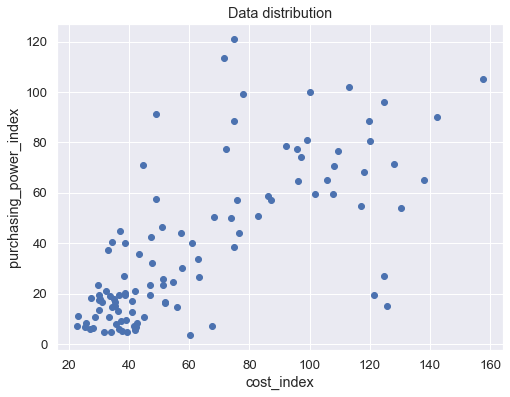

summarlize:-
dispaly this data set take a postive linear Regression
this mean the relationshape between cost_index and purchasing_power_index is postive


In [34]:
#Assign feature column to x and label column to y
x=col_df['cost_index'].values.reshape(-1,1)
y=col_df['purchasing_power_index'].values.reshape(-1,1)

#Visualization Data distribution
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y)
plt.xlabel('cost_index')
plt.ylabel('purchasing_power_index')
plt.show()
print('summarlize:-' )
print ('dispaly this data set take a postive linear Regression')
print ('this mean the relationshape between cost_index and purchasing_power_index is postive')

In [35]:
#Model Training
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
LR.intercept_,LR.coef_#w0(y_axis),w1(slope)  h@=mx+b  

(array([-2.06226818]), array([[0.64283663]]))

In [36]:
#Model prediction
y_pred=LR.predict(x)
cost_error=LR.predict(x)-y # Cost Function Error = Y Acualy - y Prediction
print('Acualy Values =\n ',LR.predict(x[:5]) )
print('Prediction Values =\n ',y[:5] )
print('Error Values = \n',cost_error[:5] )

Acualy Values =
  [[99.24878461]
 [89.47766784]
 [86.58490301]
 [81.63506097]
 [80.22082038]]
Prediction Values =
  [[105. ]
 [ 90.1]
 [ 65.2]
 [ 54.1]
 [ 71.5]]
Error Values = 
 [[-5.75121539]
 [-0.62233216]
 [21.38490301]
 [27.53506097]
 [ 8.72082038]]


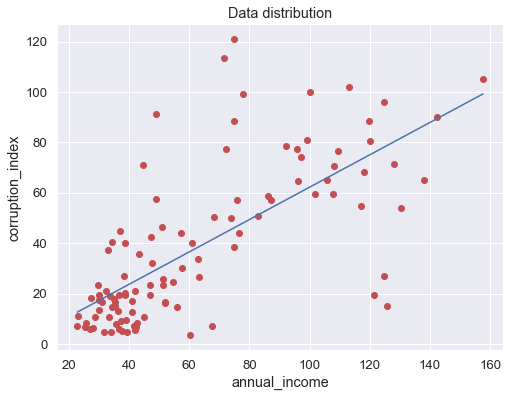

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,c='r')
plt.plot(x,y_pred)#Best Fit Line
plt.title('Data distribution')
plt.xlabel('annual_income')
plt.ylabel('corruption_index')
plt.show()

In [38]:
#Standerd Error = sum(y-y_pred)
Standerd_Error =np.sum(y-LR.predict(x))
print('Standerd_Error : ',Standerd_Error)

#MAE=1/m *abs(y-y_pred)
import sklearn.metrics as mc
MAE=mc.mean_absolute_error(y,y_pred)
print('MAE is : ',MAE)#STD is larg

# MSE = (1/n) * np.sum((h_x - y)**2)
MSE=mc.mean_squared_error(y,y_pred)
print('MSE is : ',MSE)


#import math
#MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
#RMSE = math.sqrt(MSE)
RMSE=np.sqrt(mc.mean_squared_error(y,y_pred))
print('RMSE is : ',RMSE)

#R Squared =1- (yi Acualy - yi Prediction)**2 / (yi Acualy- yi mean)**2
#𝑅2 = 1 - (SUM((y - ypred)**2) / SUM((y - AVG(y))**2))
#R Squared =1- (MSA / (yi Acualy- yi mean)**2
from sklearn.metrics import r2_score
r2=r2_score(y,y_pred)
𝑅2 = 1 - (sum((y - y_pred)**2) / sum((y - np.mean(y))**2))
print('R Square Manually : ' ,R2)
print('R Square : ' ,r2)


#Adjusted_R2 = 1-(1-r2)*(m-1)/m-p-1
#m= Number Of Rows =  110(m= x.shape[0] // len(x))
#P= Number Of Features
Adjusted_R2 =1-(1-r2)*(len(x)-1)/len(x)-1-1
print('Adjusted R2 : ' ,Adjusted_R2)

Standerd_Error :  -6.066258606551855e-13
MAE is :  14.788199481298834
MSE is :  460.6403084462412
RMSE is :  21.462532666165966
R Square Manually :  [0.5030222]
R Square :  0.5030221955041567
Adjusted R2 :  -1.4923331521173775


In [39]:
Evaluations =pd.DataFrame({'MSE':[MSE],
                           'RMSE':[RMSE],
                           'MAE':[MAE],
                           'R Square':[r2],
                           'Adjusted R2':[Adjusted_R2],
                          'Standerd_Error ':[Standerd_Error]})
Evaluations.T

,0
MSE,4.606403e+02
RMSE,2.146253e+01
MAE,1.478820e+01
R Square,5.030222e-01
Adjusted R2,-1.492333e+00
Standerd_Error,-6.066259e-13


In [40]:
data_pred=pd.DataFrame({'cost_index':x.flatten(),
                   'purchasing_power_index':y.flatten(),
                   'purchasing_power_index_Pred':y_pred.flatten(),
                   "Cost_Error":cost_error.flatten()})
#data_pred.style.background_gradient(axis=0, gmap=data_pred['Scores_Pred'], cmap='YlOrRd')
data_pred.head(10)

,cost_index,purchasing_power_index,purchasing_power_index_Pred,Cost_Error
0,157.6,105.0,99.248785,-5.751215
1,142.4,90.1,89.477668,-0.622332
2,137.9,65.2,86.584903,21.384903
3,130.2,54.1,81.635061,27.535061
4,128.0,71.5,80.220820,8.720820
5,125.8,14.9,78.806580,63.906580
6,124.6,26.9,78.035176,51.135176
7,124.6,95.9,78.035176,-17.864824
8,121.5,19.5,76.042382,56.542382
9,119.9,80.6,75.013844,-5.586156


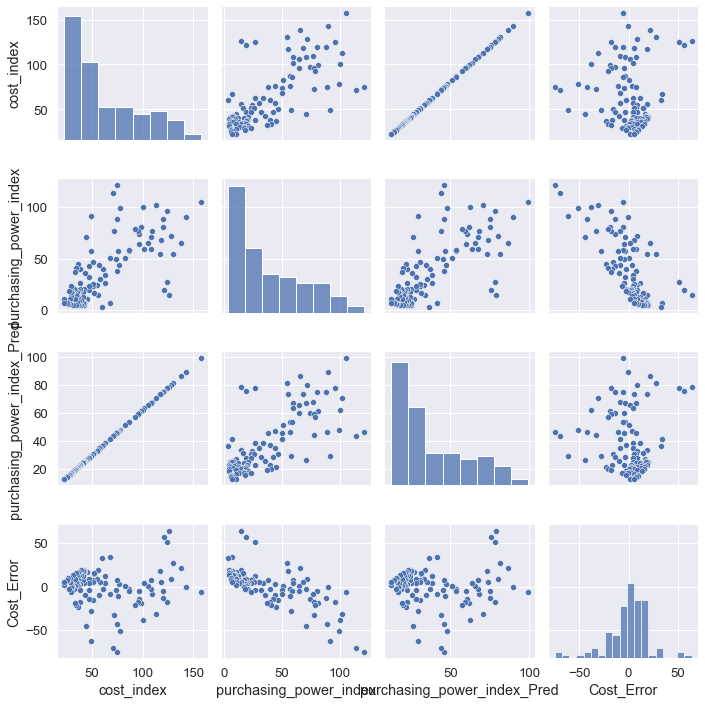

In [41]:
sns.pairplot(data_pred)

In [42]:
df=col_df.drop(['country'],axis=1)


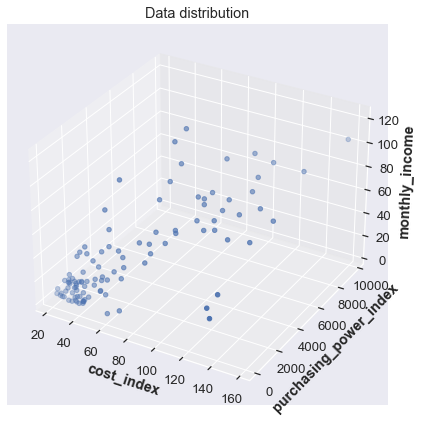

In [43]:
#Assign feature column to x and label column to y
x1=df['cost_index']
x2=df['monthly_income']
y=df['purchasing_power_index']

#print(x1.shape)
#print(x2.shape)
#print(y.shape)

#Visualization Data distribution
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (15, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x1,x2, y, color = "b")
ax.set_xlabel('cost_index', fontweight ='bold')
ax.set_ylabel('purchasing_power_index', fontweight ='bold')
ax.set_zlabel('monthly_income', fontweight ='bold')
plt.title('Data distribution')

plt.show()

In [44]:
df.insert(0,'Ones',1)# كانها تمثل x0
print('new data = \n',df.head(10))

new data = 
    Ones  cost_index  monthly_income  purchasing_power_index
0     1       157.6            9712                   105.0
1     1       142.4            7530                    90.1
2     1       137.9            5281                    65.2
3     1       130.2            4130                    54.1
4     1       128.0            5368                    71.5
5     1       125.8            1101                    14.9
6     1       124.6            1967                    26.9
7     1       124.6            7008                    95.9
8     1       121.5            1393                    19.5
9     1       119.9            5676                    80.6


In [45]:
cols =df.shape[1]
X=df.iloc[:,0:cols-1]
Y=df.iloc[:,cols-1:cols]
X= np.matrix(X.values)
Y= np.matrix(Y.values)
theta=np.matrix(np.array([0,0,0]))
#y = theta0 + theta1X + theta2X

In [46]:
alpha=0.001
iterations=1000
m=X.shape[0]
for i in range(iterations):
        hx = X*theta.T
        Error=(X*theta.T)-Y 
        
     # An empty list to store the error in each iteration
        losses = []
     # Keeping track of the error decrease
        MSE =(1/m) *np.sum(np.power((Error),2))
        
        losses.append(MSE)
    #Gradient Descent
        theta_0= theta[0,0]-alpha*(1/m)*sum(Error)*X[0,0]
        theta_1= theta[0,1]-alpha*(1/m)*sum(Error)*X[0,1]
        theta_2= theta[0,2]-alpha*(1/m)*sum(Error)*X[0,2]
        
print('theta_0',theta_0)
print('theta_1',theta_1)
print('theta_2',theta_2)
print("MSE", [[MSE]]) 
        

theta_0 [[0.03815047]]
theta_1 [[6.01251364]]
theta_2 [[370.51733832]]
MSE [[2382.3412149532705]]


# summary for the cost_of_living

1- 107 countries are being studied in terms of their secondary income and their relationship with Cost of Living all around the World and its impact on the economy

2-- Top one lowest the corruption_index rankings : Denmark = 12 , and his annual_income = 68110	
The Countries - Bermuda, Switzerland and Norway are top 3 in terms of montly_income and continue to exist in top 10 interms of purchasing_power_index and cost_index, which indicates the strong positive correlation between the features


# --------------------------------------------------------------------------------------------------

## richest_countries

In [47]:
rich_df. head(11)

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192
5,Norway,79201
6,Switzerland,77324
7,Macao,73802
8,United States,69288
9,Brunei,66620


In [48]:
rich_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         50 non-null     object
 1   gdp_per_capita  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [49]:
rich_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp_per_capita,50.0,54088.18,22709.045634,30422.0,36940.5,47316.0,62656.25,134754.0


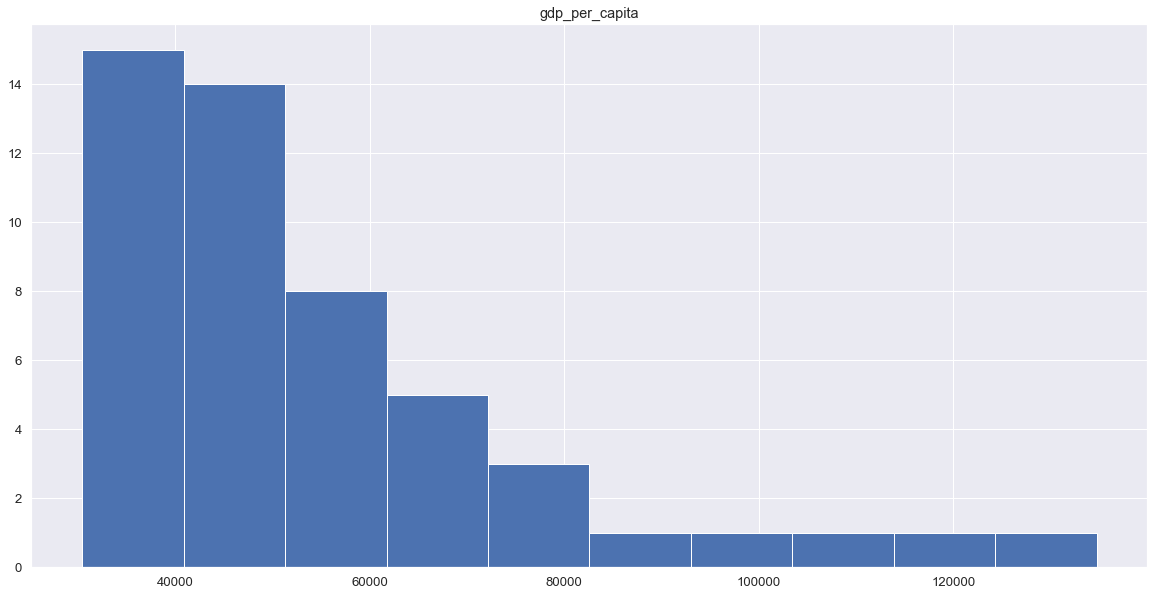

In [50]:
rich_df.hist(figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='country'>

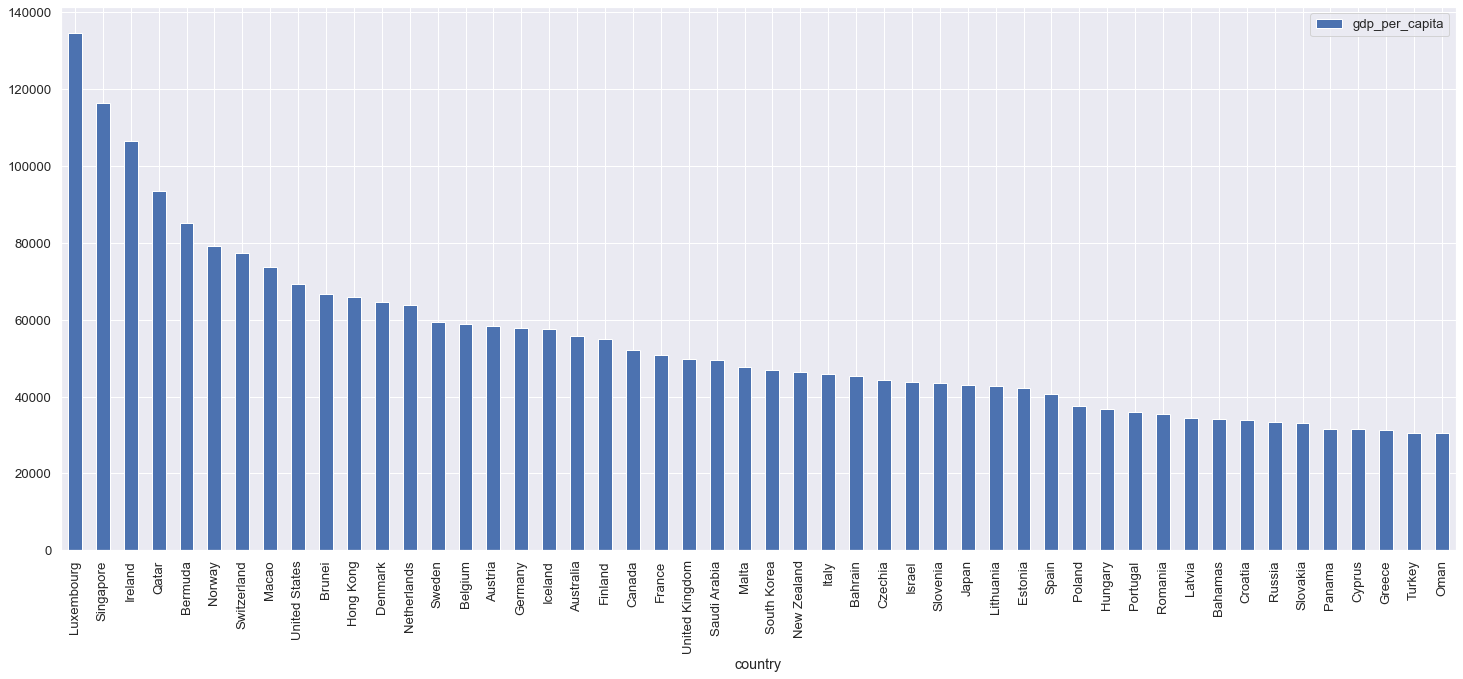

In [51]:
# relationship between gdp_per_capita and country
rich_df.plot(x='country', y='gdp_per_capita', rot=90, kind='bar', figsize=(25,10))

In [52]:
# Top 10 countries with highest gdp_per_capita
top10_rich_df = rich_df.sort_values(by='gdp_per_capita',ascending=False)[:10]
top10_rich_df

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192
5,Norway,79201
6,Switzerland,77324
7,Macao,73802
8,United States,69288
9,Brunei,66620


<AxesSubplot:xlabel='country'>

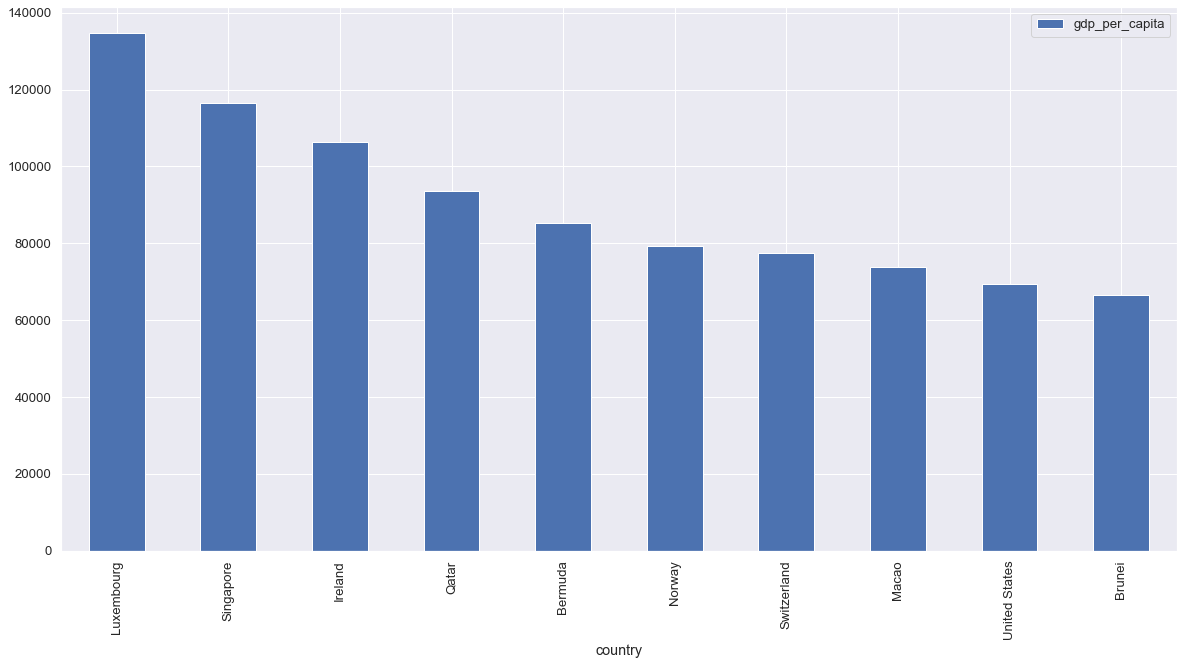

In [53]:
# relationship between corruption_index and country for top 10 countries with respect to corruption_index
top10_rich_df.plot(x='country', y='gdp_per_capita', rot=90, kind='bar', figsize=(20,10))

## 3) Tourism

In [54]:
tourism_df. head(11)

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3
5,Croatia,21.6,5.63,261,8.3
6,Turkey,16.0,13.77,862,1.7
7,Austria,15.1,15.36,1018,3.2
8,Germany,12.4,58.37,4689,1.4
9,Virgin Islands,8.6,0.69,80,16.3


In [55]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               41 non-null     object 
 1   tourists_in_millions  41 non-null     float64
 2   receipts_in_billions  41 non-null     float64
 3   receipts_per_tourist  41 non-null     int64  
 4   percentage_of_gdp     41 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [56]:
tourism_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tourists_in_millions,41.0,11.209756,20.819376,0.00,2.5,4.10,8.10,117.10
receipts_in_billions,41.0,11.256341,16.595482,0.09,2.2,4.51,11.78,84.21
receipts_per_tourist,41.0,2930.512195,4735.728456,80.00,533.0,1018.00,2882.00,24601.00
percentage_of_gdp,41.0,3.482927,5.519914,0.20,0.8,1.70,3.40,31.60


In [57]:
tourism_df.corr()

,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
tourists_in_millions,1.000000,0.468412,-0.224636,-0.099293
receipts_in_billions,0.468412,1.000000,0.158790,-0.048773
receipts_per_tourist,-0.224636,0.158790,1.000000,0.103868
percentage_of_gdp,-0.099293,-0.048773,0.103868,1.000000


<AxesSubplot:>

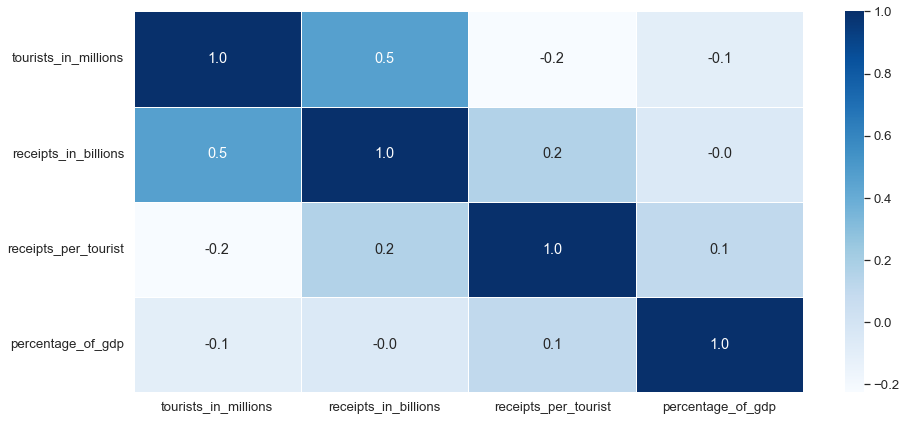

In [58]:
sns.set(rc={'figure.figsize':[15,7]},font_scale=1.2)
sns.heatmap(tourism_df.corr(),annot=True,fmt='.1f',linewidths=.5,cmap='Blues')

<AxesSubplot:xlabel='country'>

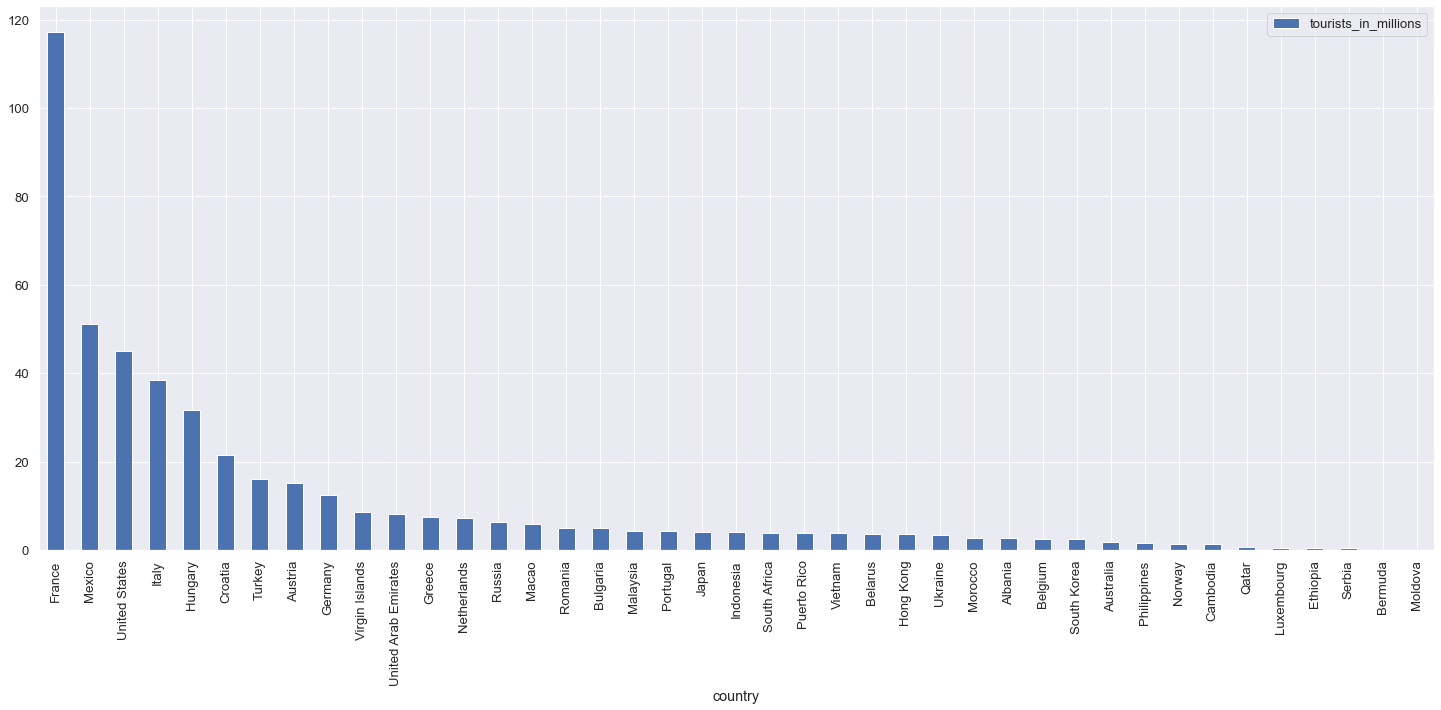

In [59]:
# relationship between tourists_in_millions and country
tourism_df.plot(x='country', y='tourists_in_millions', rot=90, kind='bar', figsize=(25,10))

In [60]:
# Top 10 countries with highest unemployment rate
top10_tourism_df = tourism_df.sort_values(by='tourists_in_millions',ascending=False)[:10]
top10_tourism_df

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3
5,Croatia,21.6,5.63,261,8.3
6,Turkey,16.0,13.77,862,1.7
7,Austria,15.1,15.36,1018,3.2
8,Germany,12.4,58.37,4689,1.4
9,Virgin Islands,8.6,0.69,80,16.3


<AxesSubplot:xlabel='country'>

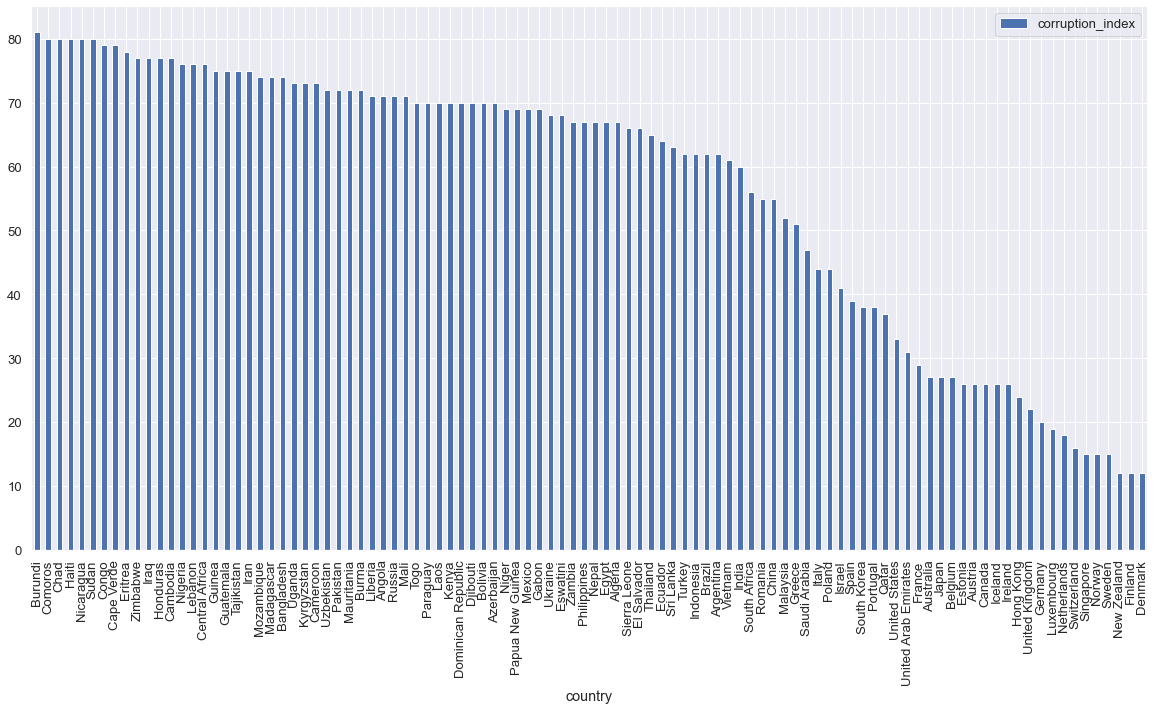

In [61]:
# relationship between corruption_index and country for top 10 countries with respect to corruption_index
top10_corruption_df.plot(x='country', y='corruption_index', rot=90, kind='bar', figsize=(20,10))

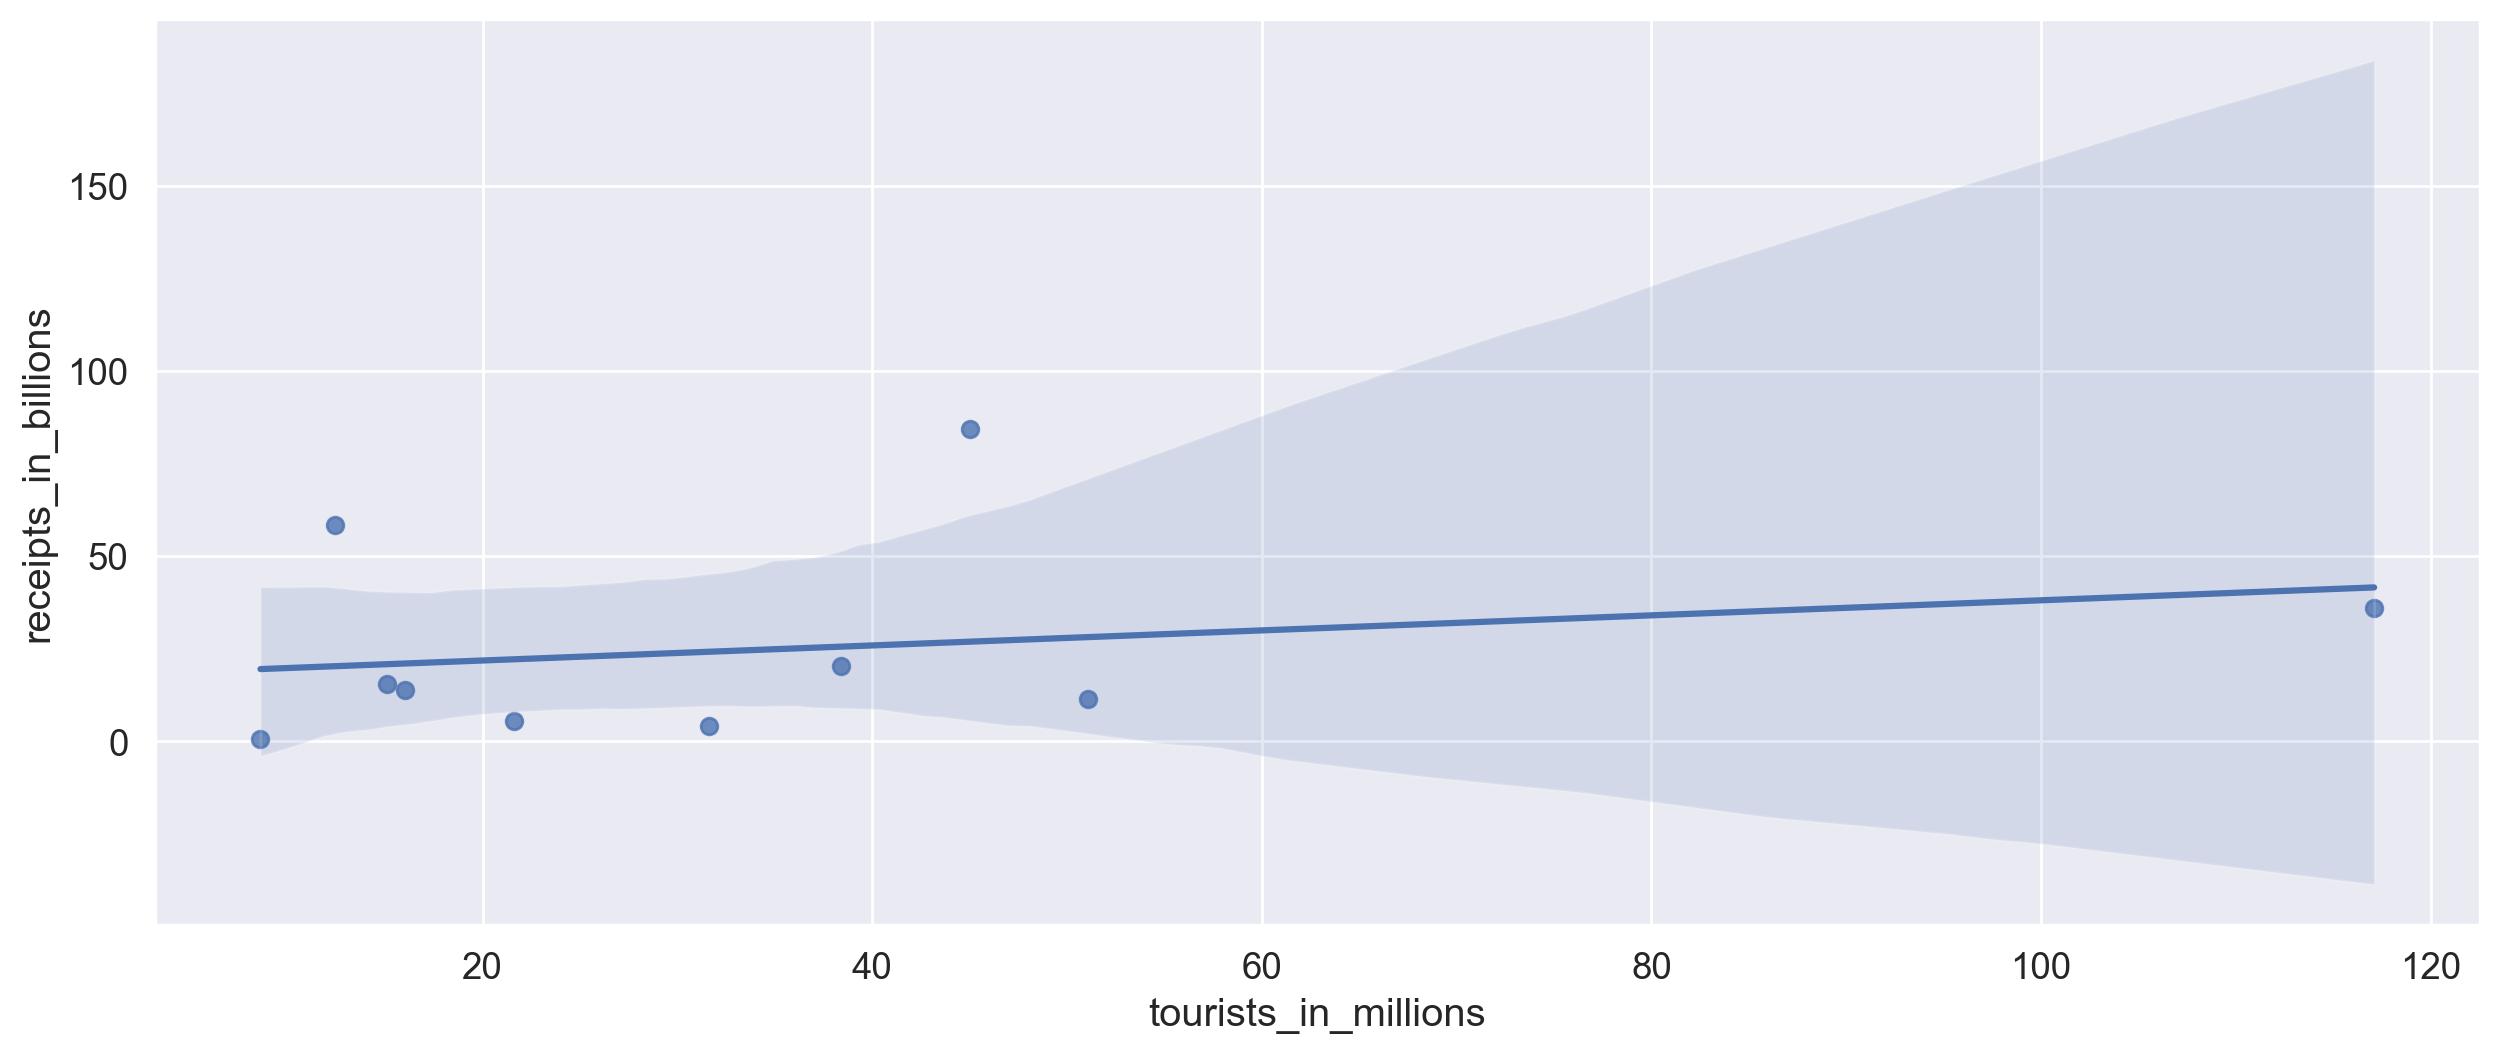

In [62]:
# relationship between tourists_in_millions and receipts_in_billions for top 10 countries by tourist visit
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=top10_tourism_df, x='tourists_in_millions', y='receipts_in_billions', marker="o")
plt.show();

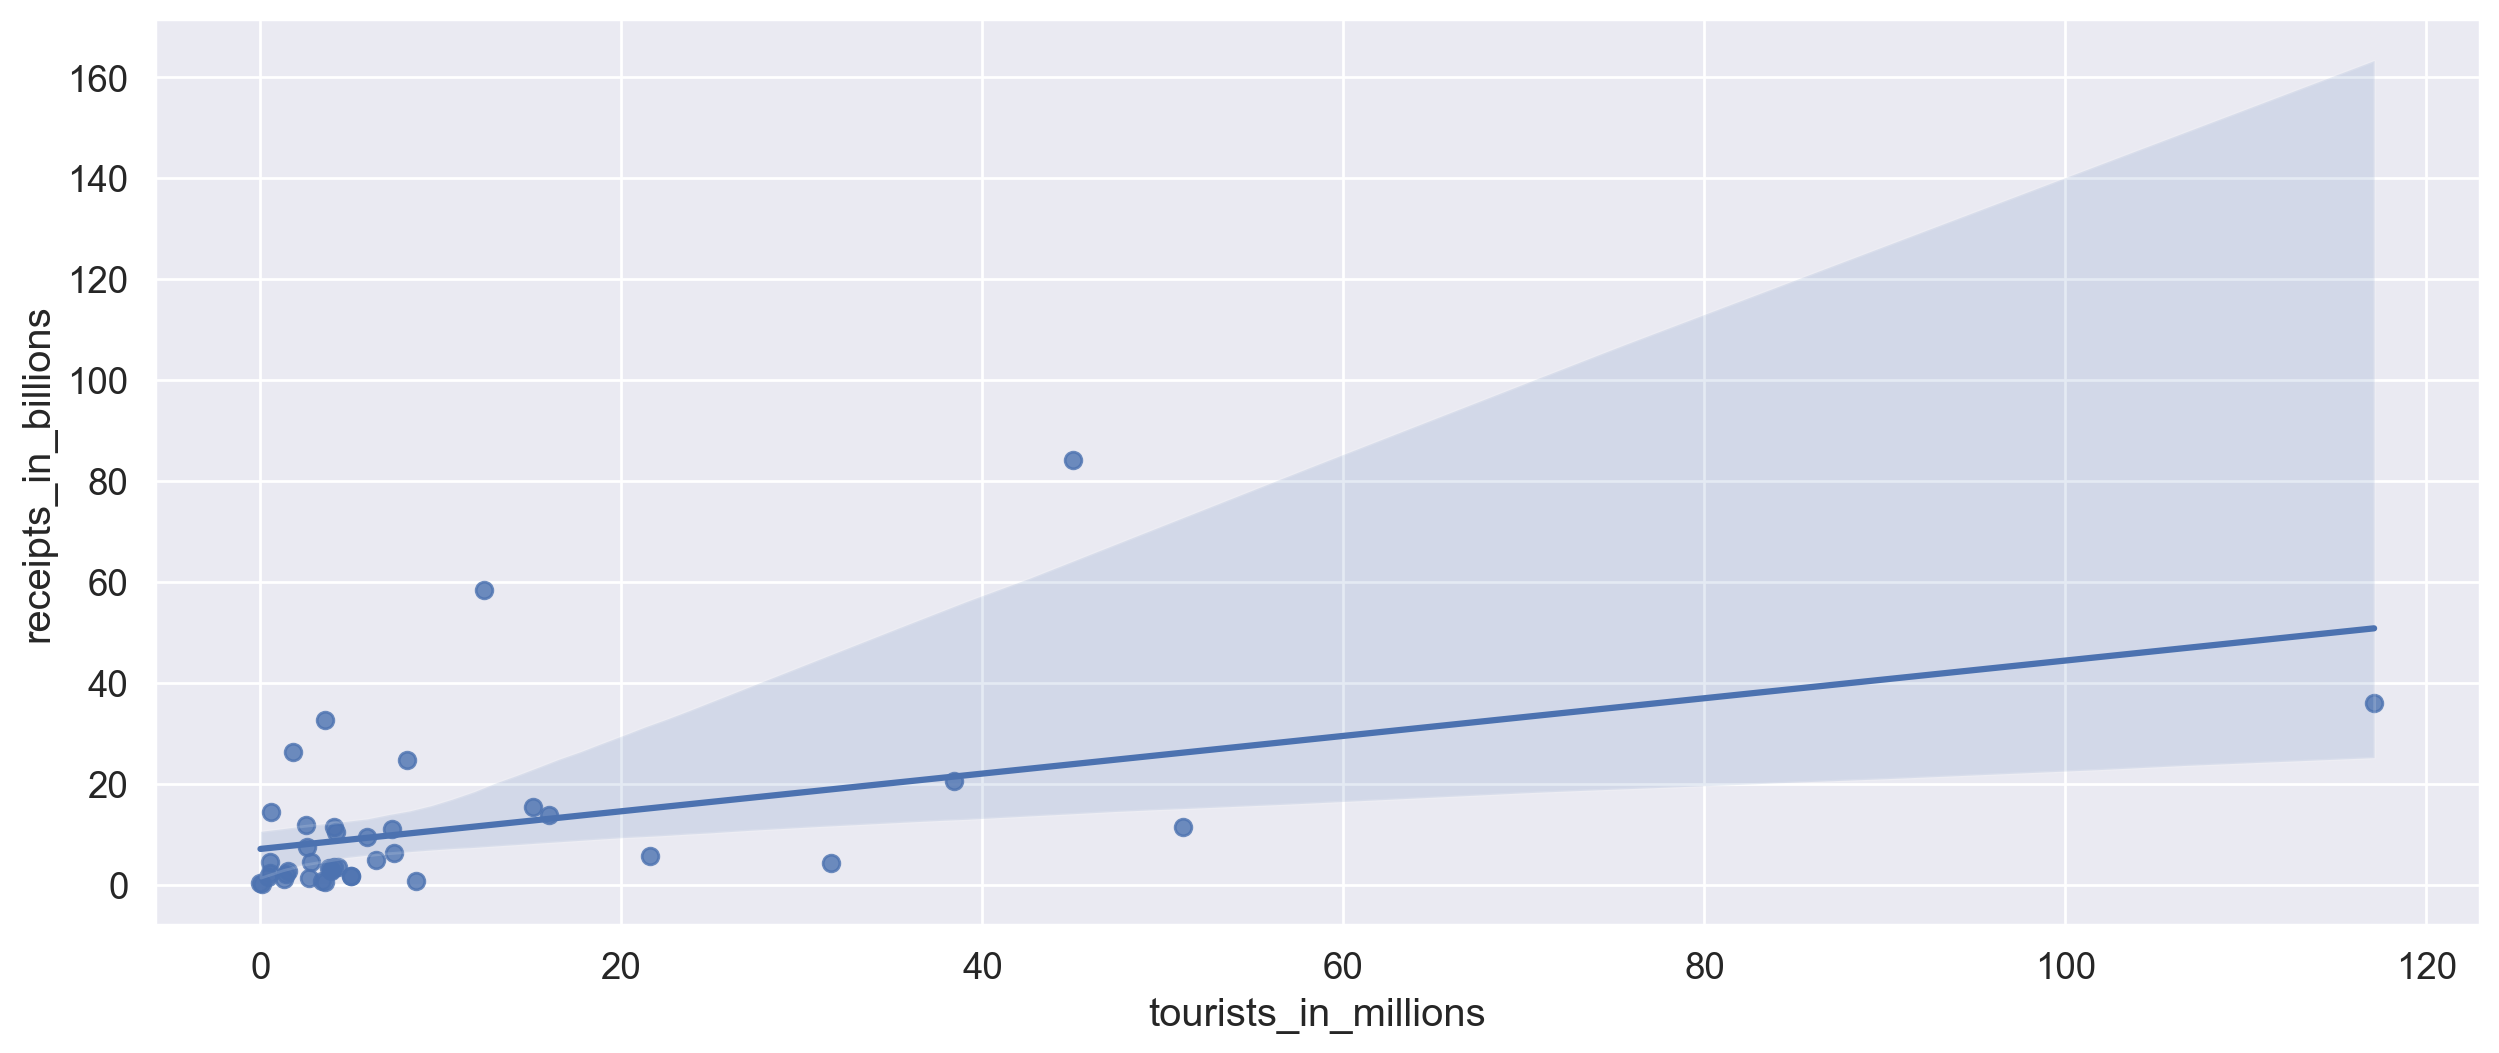

In [63]:
# relationship between tourists_in_millions and receipts_in_billions for all countries

plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=tourism_df, x='tourists_in_millions', y='receipts_in_billions', marker="o")
plt.show();


# Creat The Model 

In [64]:
df3=tourism_df.drop(['country'],axis=1)
df3.head(5)

,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,117.1,35.96,307,1.2
1,51.1,11.45,224,0.9
2,45.0,84.21,1870,0.4
3,38.4,20.46,533,1.0
4,31.6,4.22,133,2.3


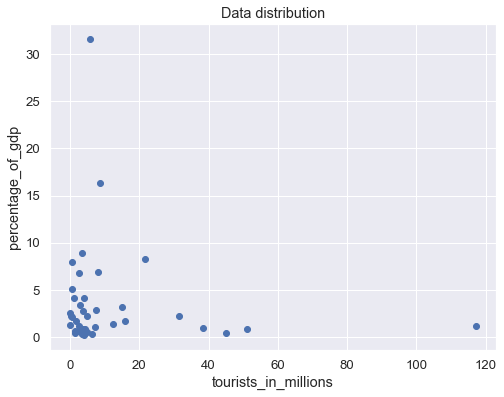

In [65]:
#Assign feature column to x and label column to y
x=df3['tourists_in_millions'].values.reshape(-1,1)
y=df3['percentage_of_gdp'].values.reshape(-1,1)

#Visualization Data distribution
plt.figure(figsize=(8,6))
plt.title('Data distribution')
plt.scatter(x, y)
plt.xlabel('tourists_in_millions')
plt.ylabel('percentage_of_gdp')
plt.show()


In [66]:
#Model Training
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)
LR.intercept_,LR.coef_#w0(y_axis),w1(slope)  h@=mx+b  

(array([3.77803278]), array([[-0.02632581]]))

In [67]:
#Model prediction
y_pred=LR.predict(x)
cost_error=LR.predict(x)-y # Cost Function Error = Y Acualy - y Prediction
print('Acualy Values =\n ',LR.predict(x[:5]) )
print('Prediction Values =\n ',y[:5] )
print('Error Values = \n',cost_error[:5] )

Acualy Values =
  [[0.69527999]
 [2.4327837 ]
 [2.59337116]
 [2.76712153]
 [2.94613707]]
Prediction Values =
  [[1.2]
 [0.9]
 [0.4]
 [1. ]
 [2.3]]
Error Values = 
 [[-0.50472001]
 [ 1.5327837 ]
 [ 2.19337116]
 [ 1.76712153]
 [ 0.64613707]]


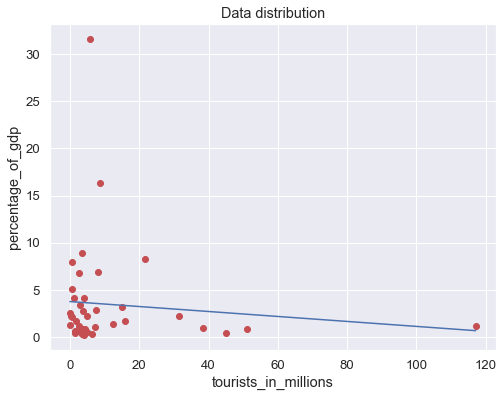

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,c='r')
plt.plot(x,y_pred)#Best Fit Line
plt.title('Data distribution')
plt.xlabel('tourists_in_millions')
plt.ylabel('percentage_of_gdp')
plt.show()

# EValuation Model

In [69]:
#Standerd Error = sum(y-y_pred)
Standerd_Error =np.sum(y-LR.predict(x))
print('Standerd_Error : ',Standerd_Error)

#MAE=1/m *abs(y-y_pred)
import sklearn.metrics as mc
MAE=mc.mean_absolute_error(y,y_pred)
print('MAE is : ',MAE)#STD is larg

# MSE = (1/n) * np.sum((h_x - y)**2)
MSE=mc.mean_squared_error(y,y_pred)
print('MSE is : ',MSE)


#import math
#MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
#RMSE = math.sqrt(MSE)
RMSE=np.sqrt(mc.mean_squared_error(y,y_pred))
print('RMSE is : ',RMSE)

#R Squared =1- (yi Acualy - yi Prediction)**2 / (yi Acualy- yi mean)**2
#𝑅2 = 1 - (SUM((y - ypred)**2) / SUM((y - AVG(y))**2))
#R Squared =1- (MSA / (yi Acualy- yi mean)**2
from sklearn.metrics import r2_score
r2=r2_score(y,y_pred)
𝑅2 = 1 - (sum((y - y_pred)**2) / sum((y - np.mean(y))**2))
print('R Square Manually : ' ,R2)
print('R Square : ' ,r2)


#Adjusted_R2 = 1-(1-r2)*(m-1)/m-p-1
#m= Number Of Rows =  110(m= x.shape[0] // len(x))
#P= Number Of Features
Adjusted_R2 =1-(1-r2)*(len(x)-1)/len(x)-1-1
print('Adjusted R2 : ' ,Adjusted_R2)

Standerd_Error :  3.2862601528904634e-14
MAE is :  3.147687618090197
MSE is :  29.433221320269084
RMSE is :  5.425239286913443
R Square Manually :  [0.00985903]
R Square :  0.009859034351232587
Adjusted R2 :  -1.9659911859987975


In [70]:
Evaluations =pd.DataFrame({'MSE':[MSE],
                           'RMSE':[RMSE],
                           'MAE':[MAE],
                           'R Square':[r2],
                           'Adjusted R2':[Adjusted_R2],
                          'Standerd_Error ':[Standerd_Error]})
Evaluations.T

,0
MSE,2.943322e+01
RMSE,5.425239e+00
MAE,3.147688e+00
R Square,9.859034e-03
Adjusted R2,-1.965991e+00
Standerd_Error,3.286260e-14


In [71]:
data_pred=pd.DataFrame({'tourists_in_millions':x.flatten(),
                   'percentage_of_gdp':y.flatten(),
                   'percentage_of_gdp_pred':y_pred.flatten(),
                   "Cost_Error":cost_error.flatten()})
#data_pred.style.background_gradient(axis=0, gmap=data_pred['Scores_Pred'], cmap='YlOrRd')
data_pred.head(10)

,tourists_in_millions,percentage_of_gdp,percentage_of_gdp_pred,Cost_Error
0,117.1,1.2,0.695280,-0.504720
1,51.1,0.9,2.432784,1.532784
2,45.0,0.4,2.593371,2.193371
3,38.4,1.0,2.767122,1.767122
4,31.6,2.3,2.946137,0.646137
5,21.6,8.3,3.209395,-5.090605
6,16.0,1.7,3.356820,1.656820
7,15.1,3.2,3.380513,0.180513
8,12.4,1.4,3.451593,2.051593
9,8.6,16.3,3.551631,-12.748369


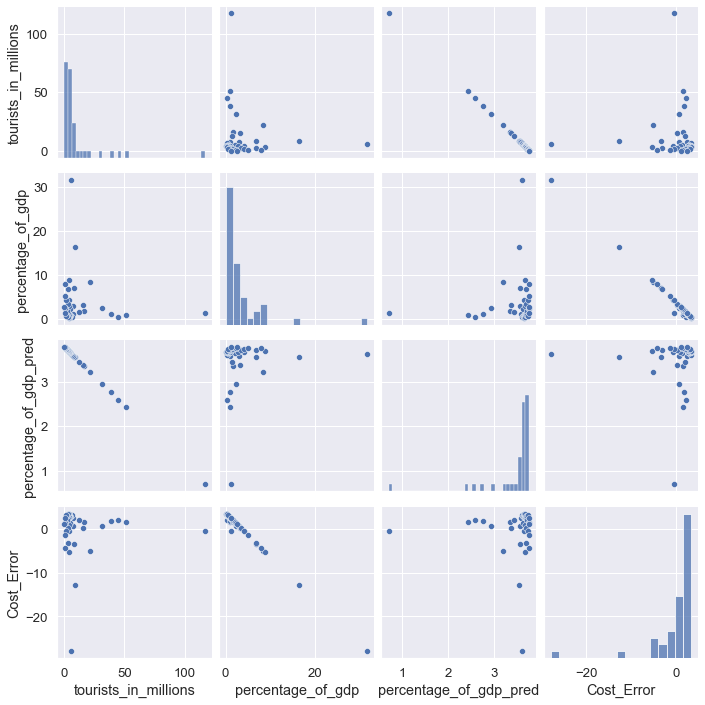

In [72]:
sns.pairplot(data_pred)

# summary for the corruption

1- 50 countries are being studied in terms of their secondary income and their relationship with tourists and its impact on the economy

2-The Correlation between tourism_in_millions and receipts_in-billions is 0.468412. No Clear linear relation between tourism_in_millions and receipts_in-billions because of outliers.

# ---------------------------------------------------------------------------------------------------------

## 4) unemployment

In [73]:
unemployment_df. head(11)

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8
5,Djibouti,28.4
6,Eswatini,25.8
7,Greece,14.8
8,Spain,14.7
9,Brazil,14.4


In [74]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            64 non-null     object 
 1   unemployment_rate  64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [75]:
unemployment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
unemployment_rate,64.0,7.823437,8.806685,0.1,2.7,5.0,8.25,36.0


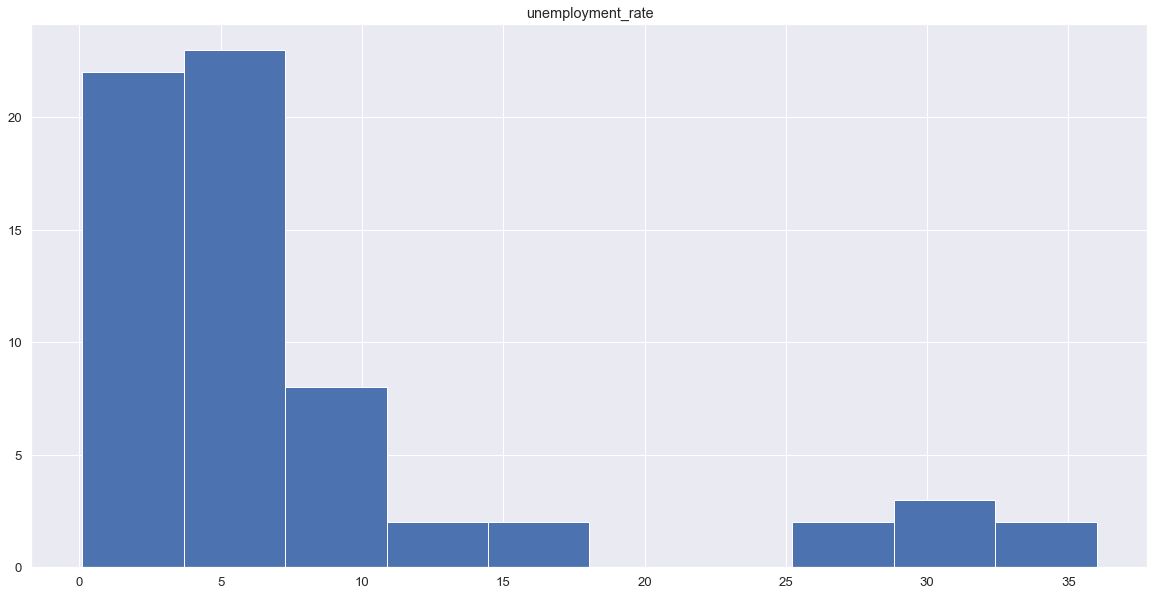

In [76]:
unemployment_df.hist(figsize=(20,10))
plt.show()

In [77]:
# Top 10 countries with highest unemployment rate
top10_unemployment_df = unemployment_df.sort_values(by='unemployment_rate',ascending=False)[:10]
top10_unemployment_df

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8
5,Djibouti,28.4
6,Eswatini,25.8
7,Greece,14.8
8,Spain,14.7
9,Brazil,14.4


<AxesSubplot:xlabel='country'>

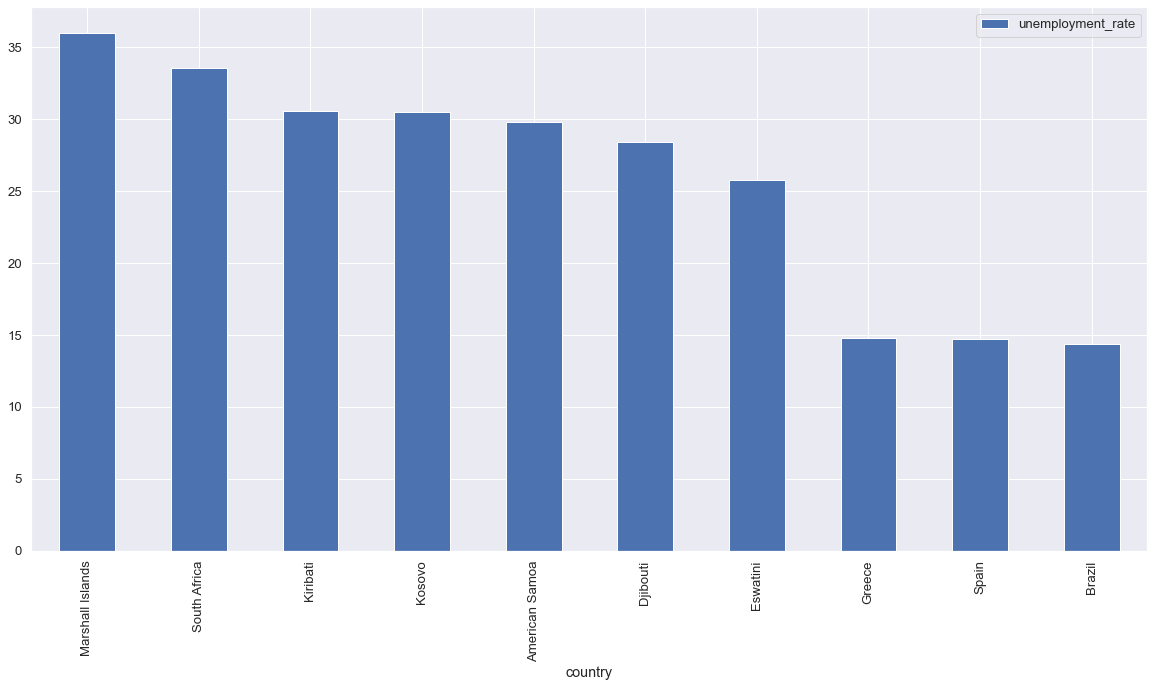

In [78]:
# relationship between corruption_index and country for top 10 countries with respect to corruption_index
top10_unemployment_df.plot(x='country', y='unemployment_rate', rot=90, kind='bar', figsize=(20,10))

## Is there a relationship between corruption and unemployment?

Yes, there is a relationship between corruption and unemployment. Corruption can lead to higher unemployment rates in a number of ways.  

First, corruption can discourage investment and economic growth. When businesses and individuals believe that they will have to pay bribes to government officials in order to get things done, they are less likely to invest in new businesses or projects. This can lead to slower economic growth and fewer job opportunities.

Second, corruption can lead to a misallocation of resources. When government officials are corrupt, they may use public funds for their own personal gain rather than for investing in things that would benefit the economy, such as education and infrastructure. This can lead to a less productive economy and fewer jobs.

Third, corruption can make it more difficult for people to find jobs. When government officials are corrupt, they may give preferential treatment to their friends and family when hiring for jobs. This can make it harder for qualified people who are not connected to the right people to find jobs.



In [82]:
data_New=all_df[['corruption_index', 'unemployment_rate']]
data_New.head(5)

,corruption_index,unemployment_rate
0,16,5.3
1,15,5.0
2,19,5.2
3,26,6.6
4,33,5.5


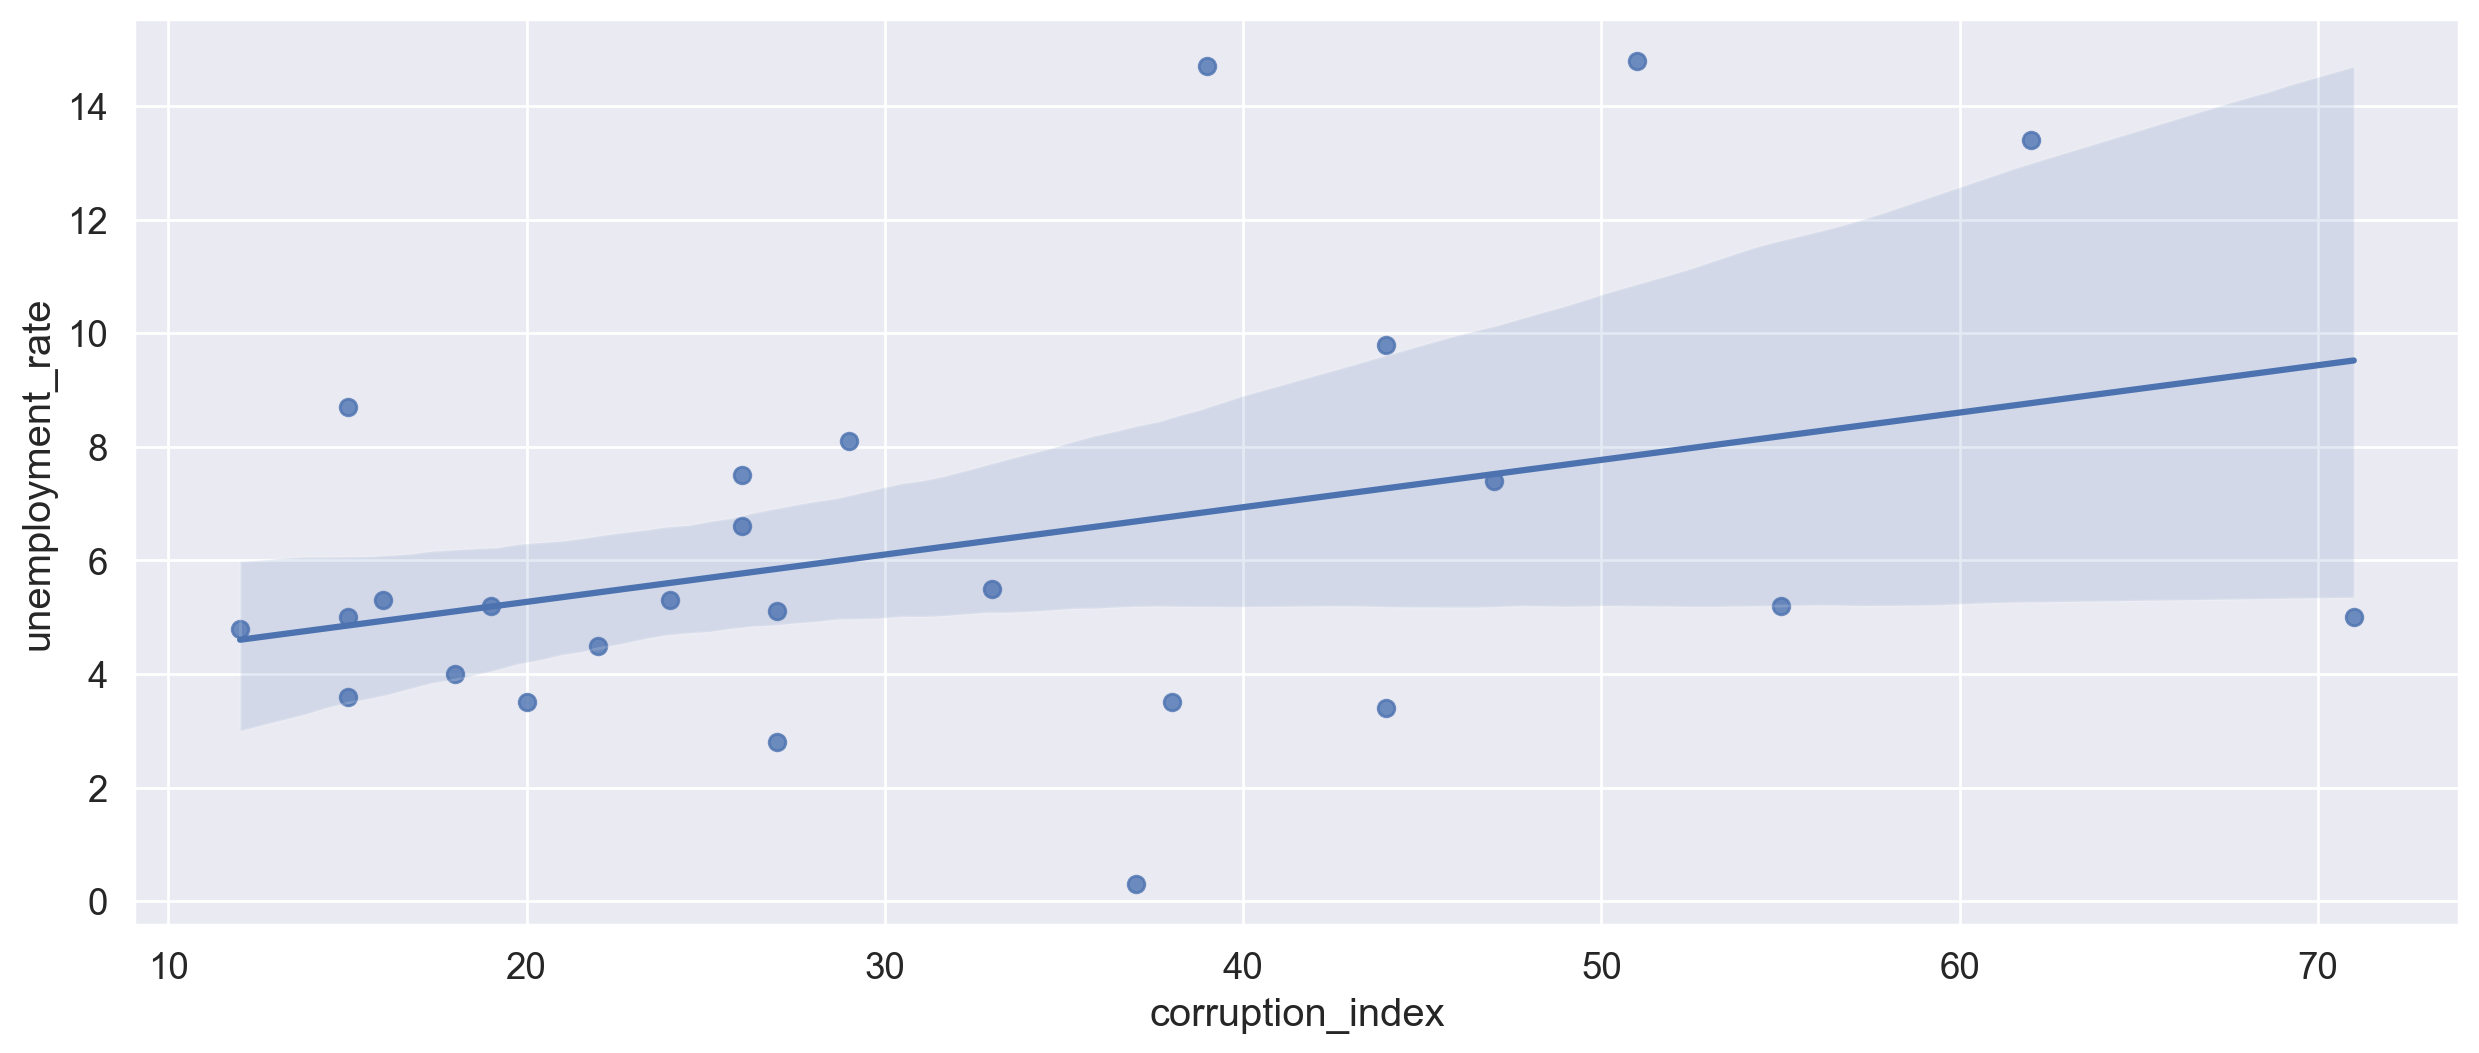

There is a direct(postive) relationship between unemployment and corruption
Finally, corruption can lead to social unrest and instability.When people see that the government is corrupt and that they are not getting a fair shake, they may become more likely to protest or even riot. This can lead to a decrease in economic activity and even more unemployment.


In [85]:
# relationship between corruption and unemployment
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=data_New, x='corruption_index', y='unemployment_rate', marker="o")
plt.show();
print("There is a direct(positive) relationship between unemployment and corruption")
print("Finally, corruption can lead to social unrest and instability.When people see that the government is corrupt and that they are not getting a fair shake, they may become more likely to protest or even riot. This can lead to a decrease in economic activity and even more unemployment.")

## Is there a relationship between annualincome and purchasing power?

Yes, there is a positive relationship between annual income and purchasing power. In other words, people with higher annual incomes tend to have higher purchasing power. This is because they have more money to spend on goods and services.

In [86]:
data_New2=all_df[['annual_income', 'purchasing_power_index']]
data_New2.head(5)

,annual_income,purchasing_power_index
0,90360,90.1
1,84090,95.9
2,81110,101.8
3,74520,88.3
4,70430,100.0


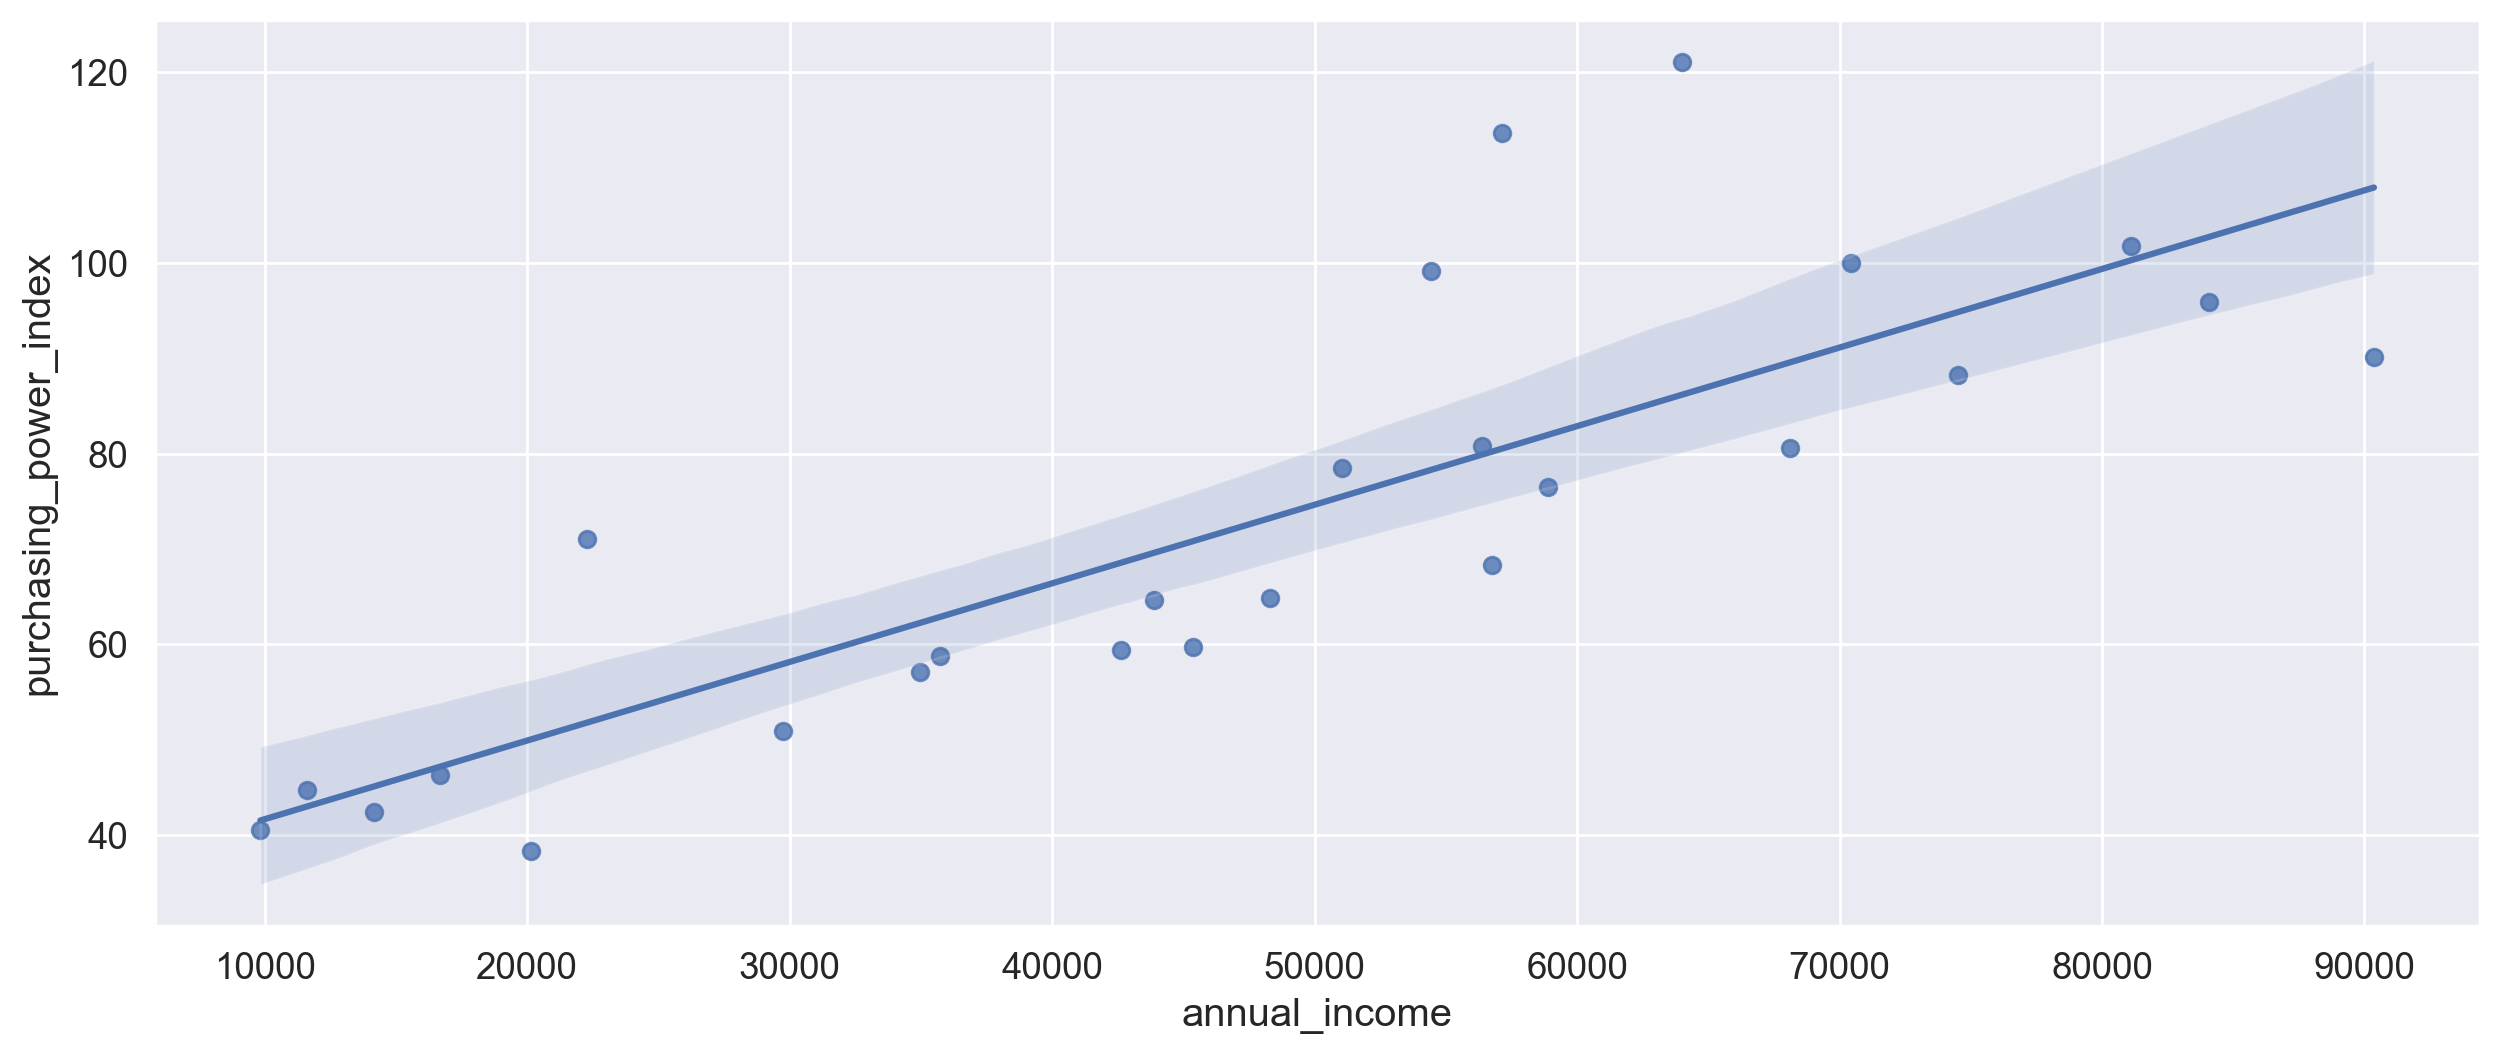

In [87]:
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=data_New2, x='annual_income', y='purchasing_power_index', marker="o")
plt.show();

## Is there a relationship between unemployment_rate and purchasing power?

Yes, there is a negative relationship between unemployment rate and purchasing power. In other words, as the unemployment rate rises, purchasing power tends to fall. This is because people who are unemployed have less money to spend on goods and services.

In [88]:
data_New3=all_df[['unemployment_rate', 'purchasing_power_index']]
data_New3.head(5)

,unemployment_rate,purchasing_power_index
0,5.3,90.1
1,5.0,95.9
2,5.2,101.8
3,6.6,88.3
4,5.5,100.0


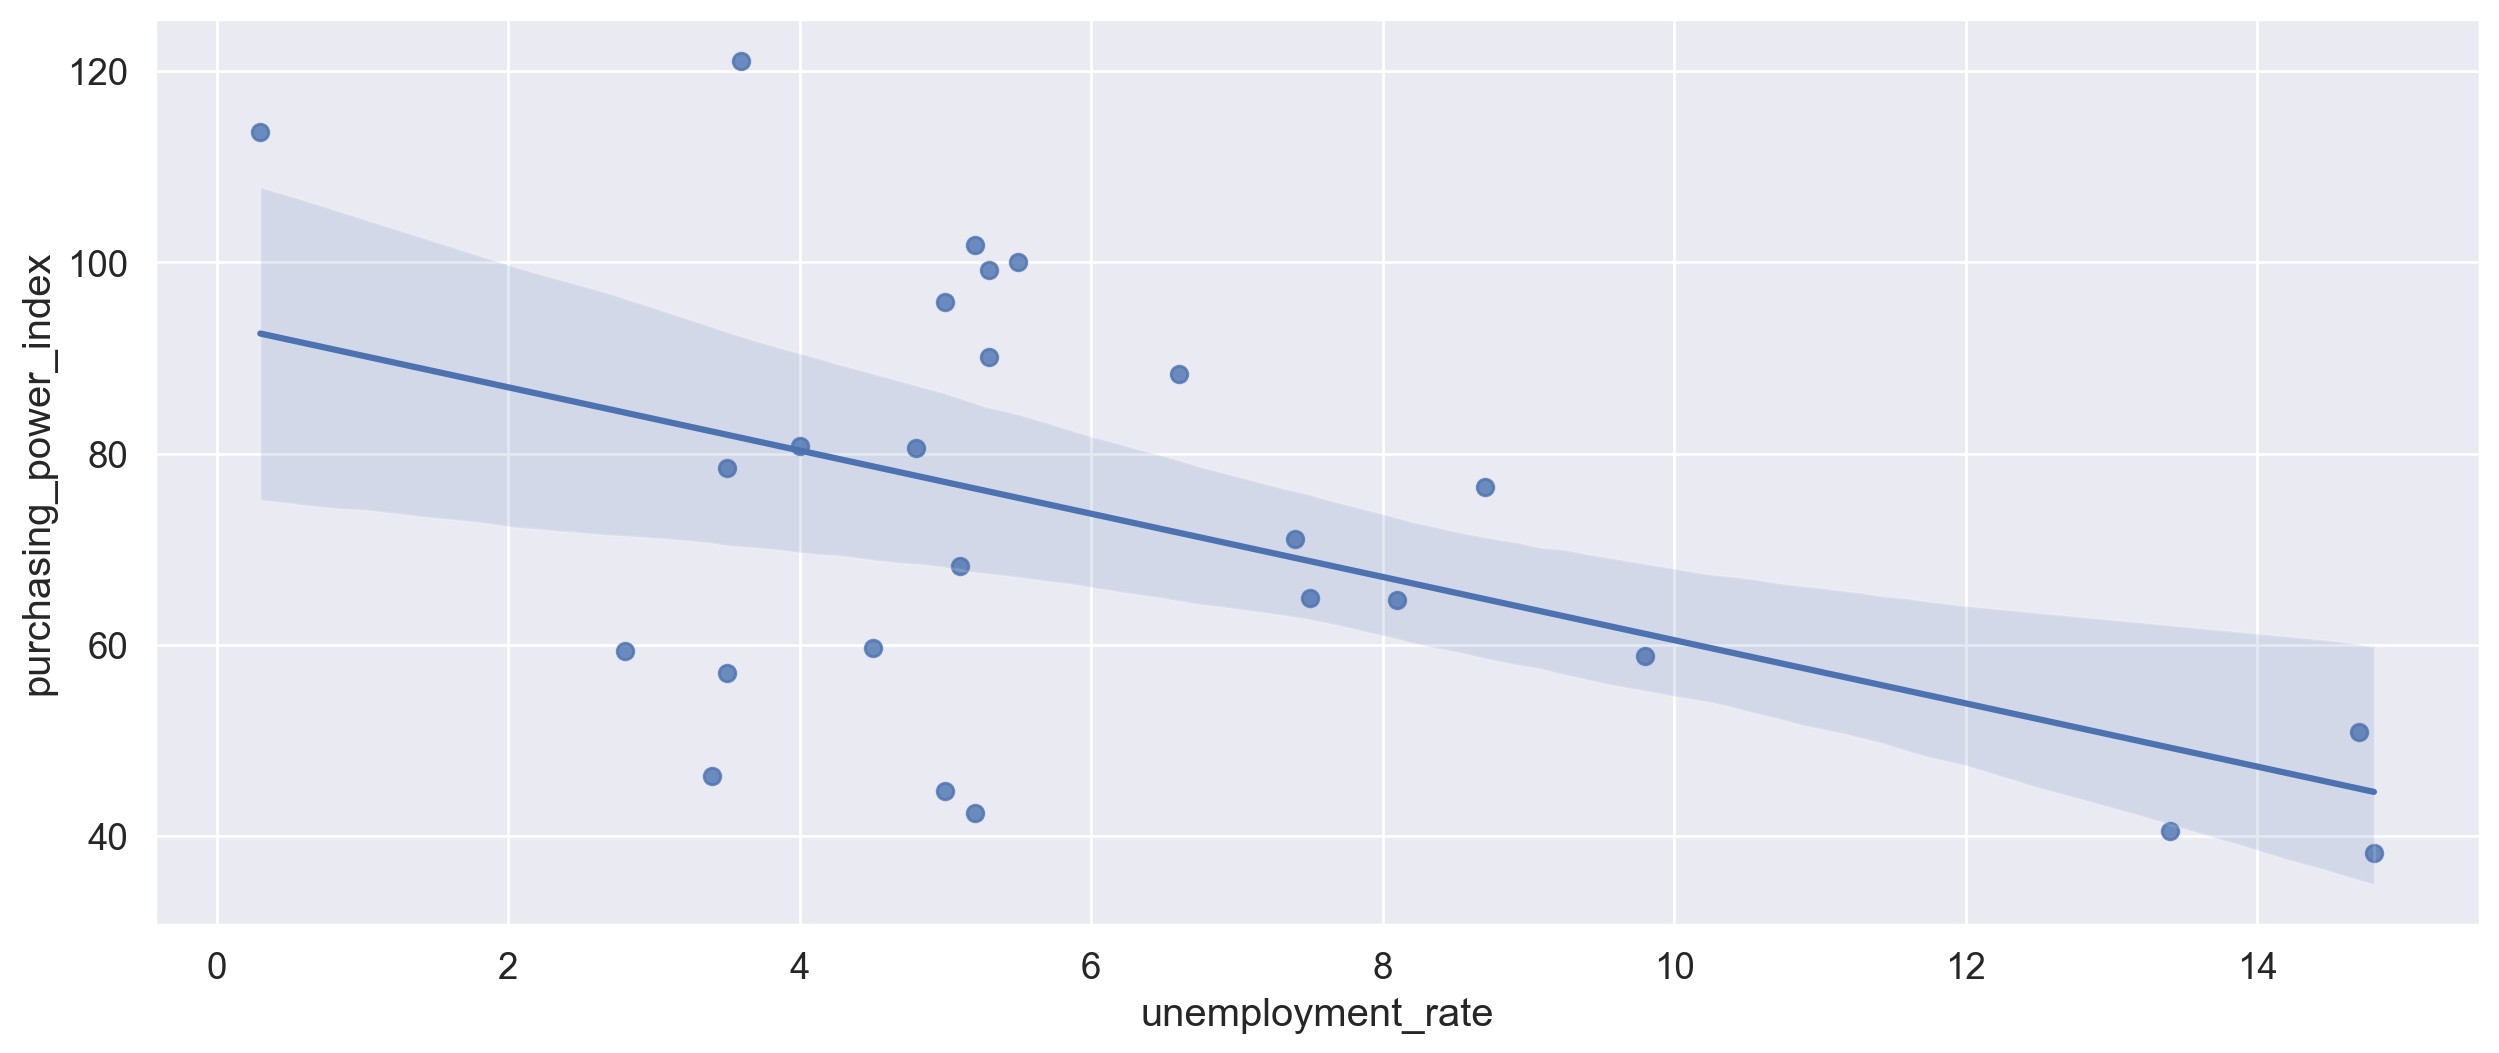

In [90]:
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=data_New3, x='unemployment_rate', y='purchasing_power_index', marker="o")
plt.show();

## Is there a relationship between GDP and purchasing power?

Yes, there is a relationship between GDP and purchasing power. In general, countries with higher GDPs tend to have higher purchasing power. This is because GDP is a measure of the total value of goods and services produced in a country, and it includes both the value of goods and services that are produced domestically and the value of goods and services that are imported.

Purchasing power is a measure of how much a person can buy with their income. It is calculated by dividing the GDP by the population. So, if a country has a high GDP and a small population, its citizens will have a high purchasing power.

In [91]:
data_New4=all_df[['gdp_per_capita', 'purchasing_power_index']]
data_New4.head(5)

,gdp_per_capita,purchasing_power_index
0,77324,90.1
1,79201,95.9
2,134754,101.8
3,106456,88.3
4,69288,100.0


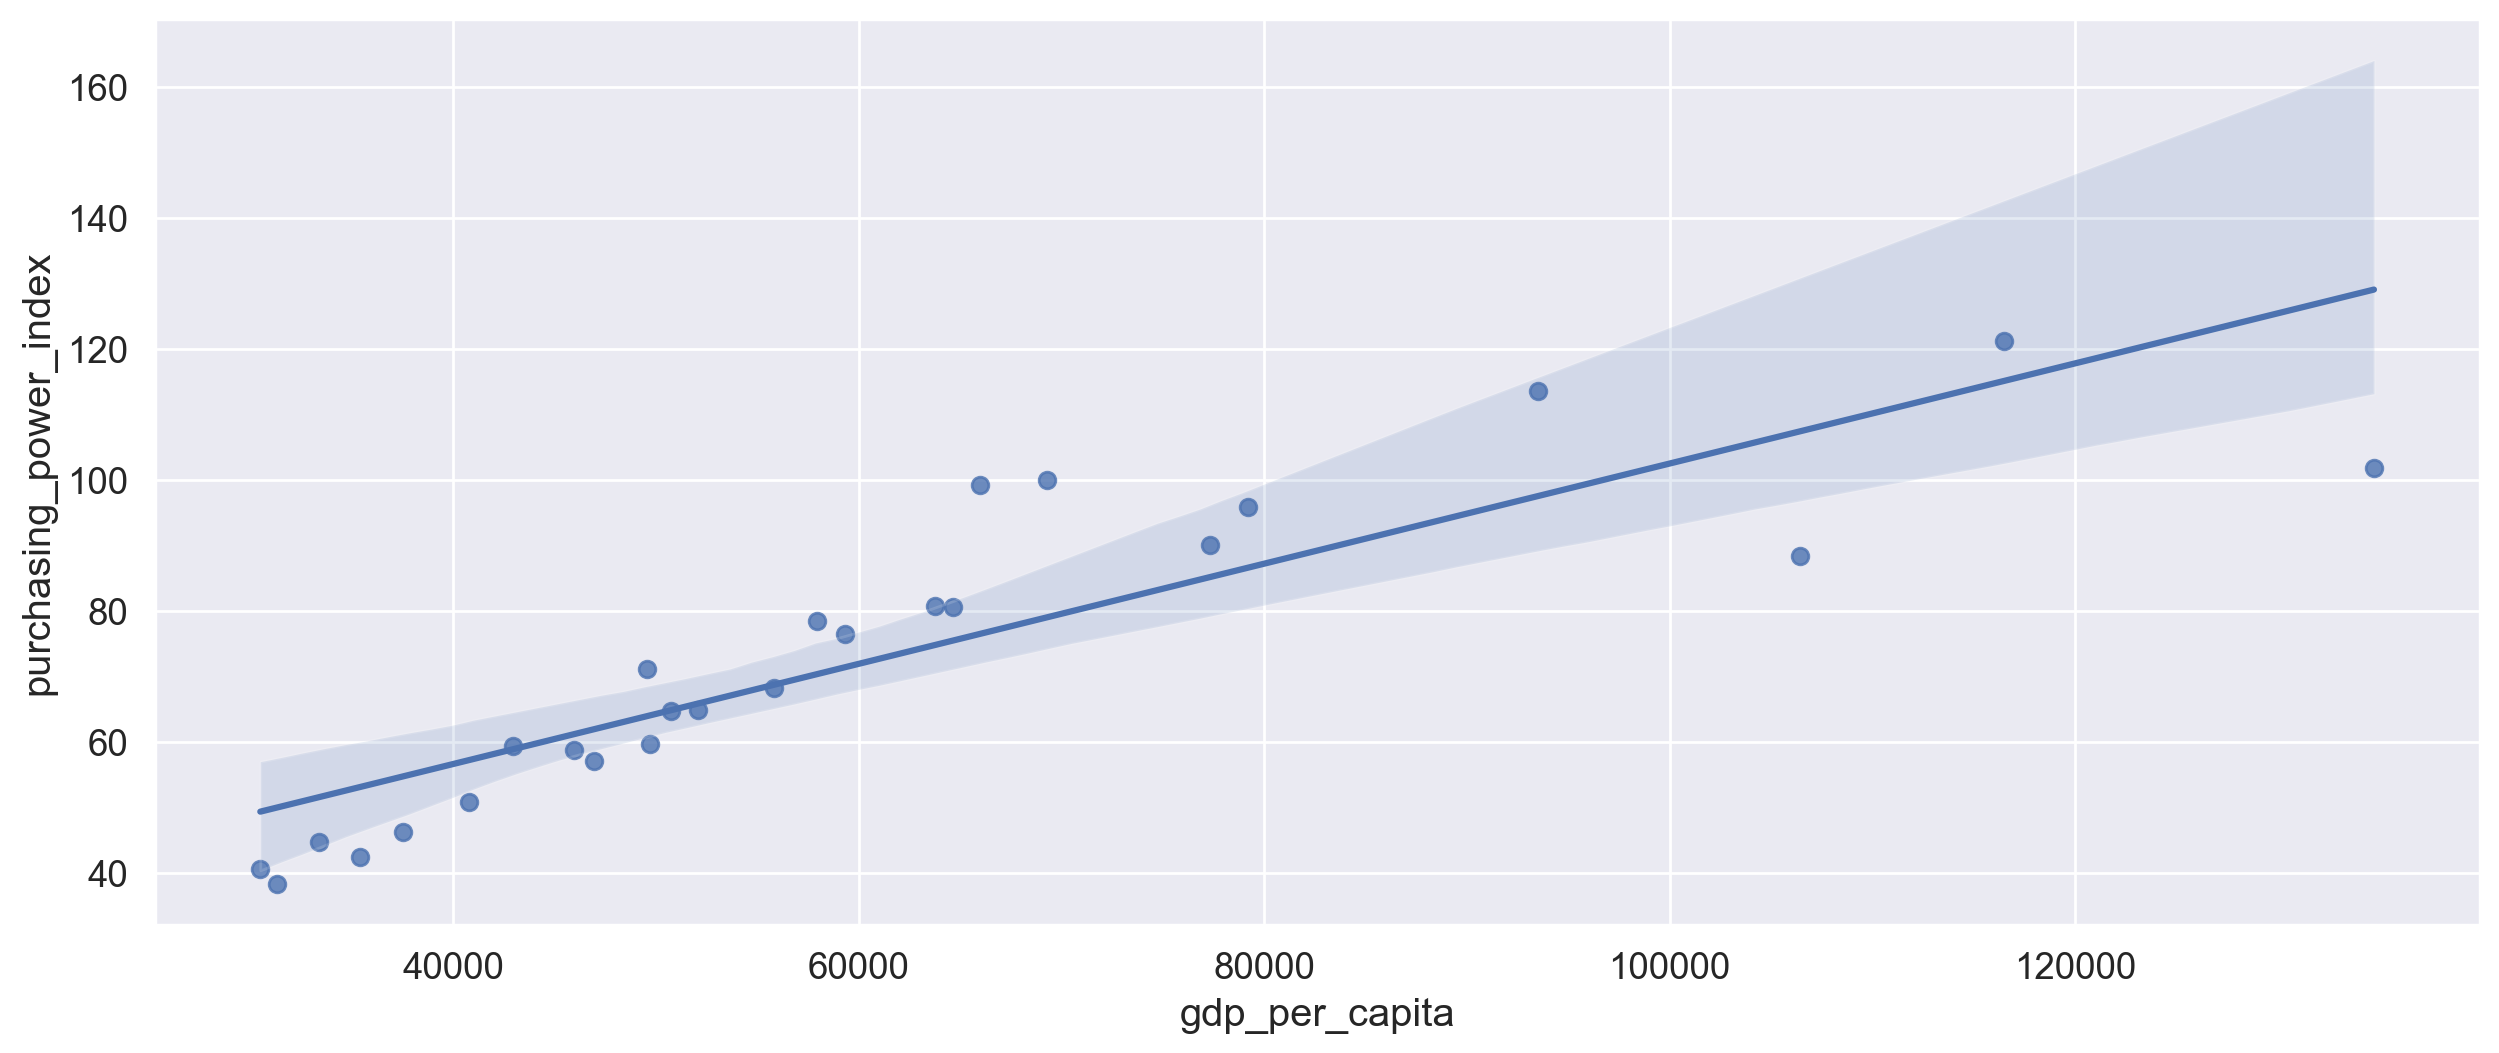

In [92]:
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=data_New4, x='gdp_per_capita', y='purchasing_power_index', marker="o")
plt.show();